## DA6401- Deep Learning Assignment 1: Exploring Neural Networks

MM21B010- Aravindan Kamatchi Sundaram

Question 1: Importing and visualizing the dataset

Dataset stored in: c:\Users\arvin\Desktop\VSCode\DA6401- Deep Learning\datasets


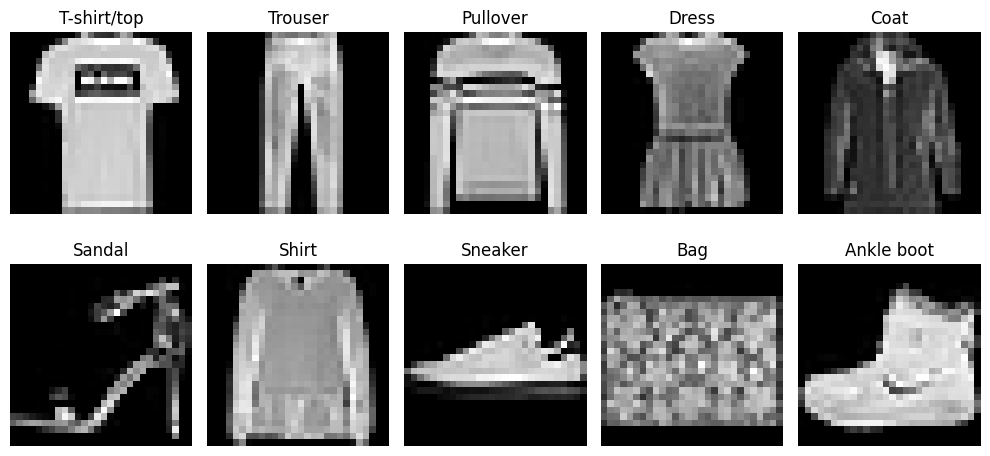

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import os
os.environ["KERAS_HOME"] = os.getcwd()

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Dataset stored in: {os.path.join(os.getcwd(), 'datasets')}")

# Fashion MNIST class labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Select one sample per class
samples = []
for i in range(10):
    idx = np.where(y_train == i)[0][0]  # First occurrence of each class
    samples.append((x_train[idx], class_labels[i]))

# Plot the samples in a grid
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (image, label) in enumerate(samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

Dataset stored in: c:\Users\arvin\Desktop\VSCode\DA6401- Deep Learning\datasets


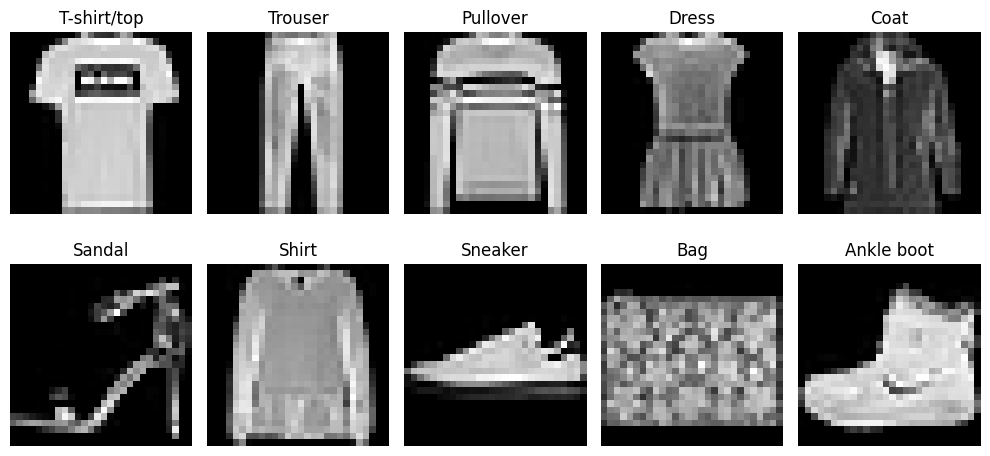

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: mm21b010 (mm21b010-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import wandb
from keras.datasets import fashion_mnist

# Set Keras home directory
os.environ["KERAS_HOME"] = os.getcwd()

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Dataset stored in: {os.path.join(os.getcwd(), 'datasets')}")

# Fashion MNIST class labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Select one sample per class
samples = []
for i in range(10):
    idx = np.where(y_train == i)[0][0]  # First occurrence of each class
    samples.append((x_train[idx], class_labels[i]))

# Plot the samples in a grid
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (image, label) in enumerate(samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()

# **Save the figure**
image_path = "fashion_mnist_samples.png"
plt.savefig(image_path, dpi=300)  # High resolution
plt.show()

# **Log image to W&B**
wandb.init(project="DL_A1_final")
wandb.run.name = "Best model final"

wandb.log({"Images from Fashion MNIST": wandb.Image(image_path, caption="Fashion MNIST Samples")})

wandb.finish()

In [2]:
import numpy as np
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  #to limit bounds and give stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [6]:
import numpy as np
L=[np.random.randn(100, 50)]
print(len(L[0][1]))

50


Question 2: Implementing a feed forward neural network

Can take various input_sizes, hidden_layers and output size. Returns a probability distribution over the output classes as required.

In [7]:
import numpy as np

class FeedforwardNN:
    def __init__(self, input_size, hidden_layers, output_size):
        """
        input_size: Number of input features (e.g., 784 for 28x28 images)
        hidden_layers: List containing the number of neurons in each hidden layer
        output_size: Number of output classes (10 for Fashion-MNIST)
        """
        self.layers = [input_size] + hidden_layers + [output_size]
        self.weights = [np.random.randn(self.layers[i], self.layers[i + 1]) * 0.01 
                        for i in range(len(self.layers) - 1)] #weights is a matrix, containing matrices of weight from layer l to layer l+1
        self.biases = [np.zeros((1, self.layers[i + 1])) for i in range(len(self.layers) - 1)]

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  #numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        """
        X: Input matrix of shape (batch_size, input_size)
        Returns: Output probability distribution of shape (batch_size, output_size)
        """
        activations = X
        for i in range(len(self.weights) - 1):
            activations = self.relu(np.dot(activations, self.weights[i]) + self.biases[i])
        output = self.softmax(np.dot(activations, self.weights[-1]) + self.biases[-1])
        return output

nn = FeedforwardNN(input_size=784, hidden_layers=[128, 64], output_size=10)

Testing on a randomly generating test set

In [8]:
X_sample = np.random.randn(5, 784)  #for testing we pass 5 images, each image is of shape(1,784)
output = nn.forward(X_sample)
print(output)  #we get 5 probability distributions for each input

[[0.09999919 0.10001242 0.0999379  0.10008238 0.09998655 0.100042
  0.10001904 0.09990121 0.1000723  0.09994701]
 [0.099995   0.09987248 0.09975193 0.10017708 0.10008263 0.09986224
  0.1000632  0.09996285 0.10000969 0.1002229 ]
 [0.10014039 0.09983003 0.0998317  0.09995511 0.10011027 0.09992189
  0.10009675 0.10012825 0.0999745  0.1000111 ]
 [0.09995364 0.09973687 0.0997897  0.10012053 0.10007266 0.09988559
  0.10022402 0.10026812 0.10001933 0.09992954]
 [0.100114   0.09991658 0.09981284 0.10007256 0.09994517 0.10003782
  0.10016612 0.10010755 0.09984252 0.09998484]]


Question 3: Neural network class with initializations as given in the bottom of the assignment. Detailed instructions given in the comments of the init class as well as README.md

Feedforward neural network class with backpropagation written from scratch

In [5]:
import numpy as np

class FeedforwardNN:
    def __init__(self, input_size, hidden_layers, output_size, 
                 learning_rate=0.1, optimizer="sgd", weight_init="random", 
                 weight_decay=0.0, loss="cross_entropy", batch_size=4, 
                 momentum=0.5, beta=0.5, beta1=0.5, beta2=0.5, epsilon=1e-6, 
                 activation="sigmoid"):
        """
        Neural network class supporting different optimizers, weight initializations, and loss functions.

        Parameters:
        - input_size: Number of input features
        - hidden_layers: List containing the number of neurons in each hidden layer
        - output_size: Number of output classes
        - learning_rate: Learning rate for optimization
        - optimizer: One of ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]
        - weight_init: "random" or "Xavier"
        - weight_decay: L2 regularization factor
        - loss: Loss function ("cross_entropy", "mean_squared_error")
        - batch_size: Batch size for training
        - momentum: Momentum factor (for momentum-based optimizers)
        - beta: Beta for RMSprop
        - beta1, beta2: Betas for Adam/Nadam
        - epsilon: Small value to avoid division by zero
        - activation: Activation function for hidden layers ("identity", "sigmoid", "tanh", "ReLU")
        """
        self.layers = [input_size] + hidden_layers + [output_size]
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.weight_decay = weight_decay
        self.loss = loss
        self.batch_size = batch_size
        self.momentum = momentum
        self.beta = beta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.activation_func = activation
        self.t = 0  #Time step for Adam/Nadam
        
        # Initialize weights and biases
        self.weights = []
        for i in range(len(self.layers) - 1):
            if weight_init == "random":
                W = np.random.randn(self.layers[i], self.layers[i+1]) * 0.01
            elif weight_init == "Xavier":
                W = np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(1 / self.layers[i])
            self.weights.append(W)
        
        self.biases = [np.zeros((1, self.layers[i+1])) for i in range(len(self.layers) - 1)]

        # Optimizer-specific memory variables
        self.m_w = [np.zeros_like(w) for w in self.weights]  
        self.m_b = [np.zeros_like(b) for b in self.biases]
        self.v_w = [np.zeros_like(w) for w in self.weights]  
        self.v_b = [np.zeros_like(b) for b in self.biases]
        self.velocity_w = [np.zeros_like(w) for w in self.weights]
        self.velocity_b = [np.zeros_like(b) for b in self.biases]

    def activation(self, x):
        if self.activation_func == "identity":
            return x
        elif self.activation_func == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif self.activation_func == "tanh":
            return np.tanh(x)
        elif self.activation_func == "relu":
            return np.maximum(0, x)

    def activation_derivative(self, x):
        if self.activation_func == "identity":
            return np.ones_like(x)
        elif self.activation_func == "sigmoid":
            return x * (1 - x)
        elif self.activation_func == "tanh":
            return 1 - x ** 2
        elif self.activation_func == "relu":
            return (x > 0).astype(float)

    def loss_function(self, y_true, y_pred):
        if self.loss == "cross_entropy":
            y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
            return -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]
        elif self.loss == "mean_squared_error":
            return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):
        self.a = [X]
        for i in range(len(self.weights)):
            z = np.dot(self.a[-1], self.weights[i]) + self.biases[i]
            self.a.append(self.activation(z))
        return self.a[-1]

    def backward(self, X, y):
        y_pred = self.a[-1]
        if self.loss == "cross_entropy":
            error = y_pred - y
        elif self.loss == "mean_squared_error":
            error = (y_pred - y) * self.activation_derivative(y_pred)
        
        grads_w = []
        grads_b = []
        for i in reversed(range(len(self.weights))):
            grads_w.insert(0, np.dot(self.a[i].T, error) / X.shape[0])
            grads_b.insert(0, np.sum(error, axis=0, keepdims=True) / X.shape[0])
            if i > 0:
                error = np.dot(error, self.weights[i].T) * self.activation_derivative(self.a[i])

        self.update_weights(grads_w, grads_b)

    def update_weights(self, grads_w, grads_b):
        self.t += 1  #time step for Adam/Nadam
        clip_value = 5  
        grads_w = [np.clip(g, -clip_value, clip_value) for g in grads_w]
        grads_b = [np.clip(g, -clip_value, clip_value) for g in grads_b]
        for i in range(len(self.weights)):
            grads_w[i] += self.weight_decay * self.weights[i]

            if self.optimizer == "sgd":
                self.weights[i] -= self.learning_rate * grads_w[i]
                self.biases[i] -= self.learning_rate * grads_b[i]

            elif self.optimizer == "momentum":
                self.velocity_w[i] = self.momentum * self.velocity_w[i] + (1 - self.momentum) * grads_w[i]
                self.velocity_b[i] = self.momentum * self.velocity_b[i] + (1 - self.momentum) * grads_b[i]
                self.weights[i] -= self.learning_rate * self.velocity_w[i]
                self.biases[i] -= self.learning_rate * self.velocity_b[i]

            elif self.optimizer == "nesterov":
                temp_w = self.weights[i] - self.momentum * self.velocity_w[i]
                temp_b = self.biases[i] - self.momentum * self.velocity_b[i]
                self.velocity_w[i] = self.momentum * self.velocity_w[i] + self.learning_rate * grads_w[i]
                self.velocity_b[i] = self.momentum * self.velocity_b[i] + self.learning_rate * grads_b[i]
                self.weights[i] = temp_w - self.learning_rate * self.velocity_w[i]
                self.biases[i] = temp_b - self.learning_rate * self.velocity_b[i]
            
            elif self.optimizer == "rmsprop":
                self.v_w[i] = self.beta2 * self.v_w[i] + (1 - self.beta2) * np.square(grads_w[i])
                self.v_b[i] = self.beta2 * self.v_b[i] + (1 - self.beta2) * np.square(grads_b[i])
                self.weights[i] -= self.learning_rate * grads_w[i] / (np.sqrt(self.v_w[i]) + self.epsilon)
                self.biases[i] -= self.learning_rate * grads_b[i] / (np.sqrt(self.v_b[i]) + self.epsilon)

            elif self.optimizer == "adam":
                self.m_w[i] = self.beta1 * self.m_w[i] + (1 - self.beta1) * grads_w[i]
                self.m_b[i] = self.beta1 * self.m_b[i] + (1 - self.beta1) * grads_b[i]
                self.v_w[i] = self.beta2 * self.v_w[i] + (1 - self.beta2) * np.square(grads_w[i])
                self.v_b[i] = self.beta2 * self.v_b[i] + (1 - self.beta2) * np.square(grads_b[i])

                m_w_hat = self.m_w[i] / (1 - self.beta1 ** self.t)
                m_b_hat = self.m_b[i] / (1 - self.beta1 ** self.t)
                v_w_hat = self.v_w[i] / (1 - self.beta2 ** self.t)
                v_b_hat = self.v_b[i] / (1 - self.beta2 ** self.t)

                self.weights[i] -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                self.biases[i] -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

            elif self.optimizer == "nadam":
                self.m_w[i] = self.beta1 * self.m_w[i] + (1 - self.beta1) * grads_w[i]
                self.m_b[i] = self.beta1 * self.m_b[i] + (1 - self.beta1) * grads_b[i]
                self.v_w[i] = self.beta2 * self.v_w[i] + (1 - self.beta2) * np.square(grads_w[i])
                self.v_b[i] = self.beta2 * self.v_b[i] + (1 - self.beta2) * np.square(grads_b[i])

                m_w_hat = self.m_w[i] / (1 - self.beta1 ** self.t)
                m_b_hat = self.m_b[i] / (1 - self.beta1 ** self.t)
                v_w_hat = self.v_w[i] / (1 - self.beta2 ** self.t)
                v_b_hat = self.v_b[i] / (1 - self.beta2 ** self.t)

                # Nadam applies the Nesterov momentum term
                nesterov_term_w = (self.beta1 * m_w_hat) + ((1 - self.beta1) * grads_w[i]) / (1 - self.beta1 ** self.t)
                nesterov_term_b = (self.beta1 * m_b_hat) + ((1 - self.beta1) * grads_b[i]) / (1 - self.beta1 ** self.t)

                self.weights[i] -= self.learning_rate * nesterov_term_w / (np.sqrt(v_w_hat) + self.epsilon)
                self.biases[i] -= self.learning_rate * nesterov_term_b / (np.sqrt(v_b_hat) + self.epsilon)


    def train(self, X, y, epochs=1):
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X, y = X[indices], y[indices]

            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch)

            print(f"Epoch {epoch+1}, Loss: {self.loss_function(y, self.forward(X)):.4f}")

Random test for sanity check

In [10]:
# Example usage
nn = FeedforwardNN(input_size=784, hidden_layers=[128, 64], output_size=10, learning_rate=0.01, optimizer="rmsprop")
X_sample = np.random.randn(1000, 784)  # 1000 training examples
y_sample = np.eye(10)[np.random.choice(10, 1000)]  # One-hot labels

nn.train(X_sample, y_sample, epochs=50, batch_size=32)

Epoch 0, Loss: 2.2308
Epoch 10, Loss: 1.7485
Epoch 20, Loss: 1.6065
Epoch 30, Loss: 1.5213
Epoch 40, Loss: 1.4306


Question 5: Hyperparameter sweep using WandB. Reasoning behind steps mentioned in the WandB report.

In [1]:
import wandb
wandb.login(key="011c3a6cd3743b4b10442ed458038feb25f78ad6")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\arvin\_netrc
wandb: Currently logged in as: mm21b010 (mm21b010-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
wandb.init(
        project="DL_A1_final", 
        name=f"hl_{wandb.config.hidden_layers}_bs_{wandb.config.batch_size}_ac_{wandb.config.activation}"
    )

In [ ]:
%pip install wandb

Random search in hyperparameter over 50 models

In [ ]:
import wandb
from wandb.integration.keras import WandbCallback
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
#preprocess
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

# Sweep configs
sweep_config = {
    "method": "random", 
    "metric": {"name": "val_loss", "goal": "minimize"},
    "parameters": {
        "epochs": {"values": [5, 10]},
        "hidden_layers": {"values": [3, 4, 5]},
        "hidden_size": {"values": [32, 64, 128]},
        "weight_decay": {"values": [0, 0.0005, 0.5]},
        "learning_rate": {"values": [1e-3, 1e-4]},
        "optimizer": {"values": ["sgd", "momentum", "nesterov", "rmsprop", "adam", "nadam"]},
        "batch_size": {"values": [16, 32, 64]},
        "weight_init": {"values": ["random", "Xavier"]},
        "activation": {"values": ["sigmoid", "tanh", "relu"]}
    }
}
sweep_id = wandb.sweep(sweep_config, project="DL_A1_final")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: 7583gu57
Sweep URL: https://wandb.ai/mm21b010-indian-institute-of-technology-madras/DL_A1_final1/sweeps/7583gu57


Carefully selected hyperparameters post reasoning from the parallel coordinates and correlation plots

In [5]:
import wandb
from wandb.integration.keras import WandbCallback
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Normalize data
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

# Sweep configuration
sweep_config = {
    "method": "grid", 
    "metric": {"name": "val_loss", "goal": "minimize"},
    "parameters": {
        "epochs": {"values": [10]},
        "hidden_layers": {"values": [3, 4, 5]},
        "hidden_size": {"values": [32, 64]},
        "weight_decay": {"values": [0, 0.0005]},
        "learning_rate": {"values": [1e-3]},
        "optimizer": {"values": ["adam", "nadam"]},
        "batch_size": {"values": [32, 64]},
        "weight_init": {"values": ["Xavier"]},
        "activation": {"values": ["tanh", "relu"]}
    }
}

# Initialize sweep
sweep_id = wandb.sweep(sweep_config, project="DL_A1_final")

Create sweep with ID: t3dxnc3s
Sweep URL: https://wandb.ai/mm21b010-indian-institute-of-technology-madras/DL_A1_final/sweeps/t3dxnc3s


WandB sweeper function

In [6]:
def train():
    wandb.init(project="DL_A1_final")  # Initialize first

    config = wandb.config  # Now we can access hyperparameters

    # Set custom run name using extracted config values
    wandb.run.name = f"hl_{config.hidden_layers}_bs_{config.batch_size}_ac_{config.activation}"
    wandb.run.save()  # Ensure the new name is reflected

    # Ensure hidden_layers is a list
    hidden_layers = [config.hidden_size] * config.hidden_layers

    # Initialize model
    model = FeedforwardNN(
        input_size=784,
        hidden_layers=hidden_layers,
        output_size=10,
        learning_rate=config.learning_rate,
        weight_decay=config.weight_decay,
        optimizer=config.optimizer,
        batch_size=config.batch_size,
        weight_init=config.weight_init,
        activation= config.activation
    )

    for epoch in range(config.epochs):
        # Train the model for one epoch
        model.train(
            X_train.reshape(-1, 784),
            np.eye(10)[y_train],
            epochs=1,
        )

        # Compute loss and accuracy on validation set
        y_pred_val = model.forward(X_val.reshape(-1, 784))
        y_pred_val = np.clip(y_pred_val, 1e-9, 1 - 1e-9)
        val_loss = -np.sum(np.eye(10)[y_val] * np.log(y_pred_val)) / X_val.shape[0]
        val_accuracy = np.mean(np.argmax(y_pred_val, axis=1) == y_val)

        # Compute loss and accuracy on training set
        y_pred_train = model.forward(X_train.reshape(-1, 784))
        y_pred_train = np.clip(y_pred_train, 1e-9, 1 - 1e-9)
        train_loss = -np.sum(np.eye(10)[y_train] * np.log(y_pred_train)) / X_train.shape[0]
        train_accuracy = np.mean(np.argmax(y_pred_train, axis=1) == y_train)

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy,
            "loss": train_loss,
            "accuracy": train_accuracy
        })

# Run sweep
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: 190hyabi with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5473
Epoch 1, Loss: 0.6024
Epoch 1, Loss: 0.5352
Epoch 1, Loss: 0.4992
Epoch 1, Loss: 0.4281
Epoch 1, Loss: 0.5034
Epoch 1, Loss: 0.4047
Epoch 1, Loss: 0.4405
Epoch 1, Loss: 0.4845
Epoch 1, Loss: 0.4538


accuracy,▁▃▄▆▆▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▆▄▂▅▁▂▄▃
val_accuracy,▁▃▄▆▆▇▇█▇▇
val_loss,▄█▄▃▁▅▁▄▆▄
accuracy,0.88694
epoch,10
loss,0.45974
val_accuracy,0.87117
val_loss,0.5439


wandb: Agent Starting Run: b1kexsh6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5438
Epoch 1, Loss: 0.5050
Epoch 1, Loss: 0.6154
Epoch 1, Loss: 0.4212
Epoch 1, Loss: 0.4837
Epoch 1, Loss: 0.4610
Epoch 1, Loss: 0.4330
Epoch 1, Loss: 0.4604
Epoch 1, Loss: 0.4779
Epoch 1, Loss: 0.4420


accuracy,▁▅▁▇▇▆▆█▆▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▄█▁▃▂▁▂▃▂
val_accuracy,▂▅▁▆▆▇▇█▅▇
val_loss,▅▅█▁▄▃▁▂▄▂
accuracy,0.86663
epoch,10
loss,0.44538
val_accuracy,0.85783
val_loss,0.47037


wandb: Agent Starting Run: a4rbtwlq with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5610
Epoch 1, Loss: 0.5410
Epoch 1, Loss: 0.5020
Epoch 1, Loss: 0.4746
Epoch 1, Loss: 0.4645
Epoch 1, Loss: 0.4554
Epoch 1, Loss: 0.4620
Epoch 1, Loss: 0.4506
Epoch 1, Loss: 0.4651
Epoch 1, Loss: 0.4765


accuracy,▁▃▅▆▇▆▇▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▄▂▂▁▂▁▂▃
val_accuracy,▁▄▆▇▇▆███▇
val_loss,█▇▄▃█▂▃▁▅▇
accuracy,0.87735
epoch,10
loss,0.4828
val_accuracy,0.8615
val_loss,0.54986


wandb: Agent Starting Run: e642yk52 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5487
Epoch 1, Loss: 0.7558
Epoch 1, Loss: 0.4947
Epoch 1, Loss: 0.4735
Epoch 1, Loss: 0.5738
Epoch 1, Loss: 0.4761
Epoch 1, Loss: 0.4906
Epoch 1, Loss: 0.5223
Epoch 1, Loss: 0.6733
Epoch 1, Loss: 0.6232


accuracy,▃▁▆▇▄█▇▇▄▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃█▂▁▃▁▁▂▆▅
val_accuracy,▄▂▇█▄█▇▇▄▁
val_loss,▂█▁▁▄▁▂▂▆▄
accuracy,0.82376
epoch,10
loss,0.63149
val_accuracy,0.81417
val_loss,0.65252


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1h388vl9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6151
Epoch 1, Loss: 0.4628
Epoch 1, Loss: 0.5493
Epoch 1, Loss: 0.5068
Epoch 1, Loss: 0.3942
Epoch 1, Loss: 0.4197
Epoch 1, Loss: 0.3902
Epoch 1, Loss: 0.4481
Epoch 1, Loss: 0.3861
Epoch 1, Loss: 0.3689


accuracy,▁▄▄▆▆▇▇▆██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▆▅▂▂▂▃▁▁
val_accuracy,▁▅▅▆▆▇▇▆▇█
val_loss,█▄▅▆▁▂▃▄▁▂
accuracy,0.901
epoch,10
loss,0.37278
val_accuracy,0.881
val_loss,0.48888


wandb: Agent Starting Run: t4fqy6ih with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5391
Epoch 1, Loss: 0.4543
Epoch 1, Loss: 0.4482
Epoch 1, Loss: 0.5206
Epoch 1, Loss: 0.6297
Epoch 1, Loss: 0.5240
Epoch 1, Loss: 0.4679
Epoch 1, Loss: 0.4677
Epoch 1, Loss: 0.4318
Epoch 1, Loss: 0.4758


accuracy,▁▅▅▄▄▆▆▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▂▂▄█▄▂▂▁▃
val_accuracy,▁▆▅▄▄▆▆██▇
val_loss,▃▁▂▄█▄▂▂▁▃
accuracy,0.86667
epoch,10
loss,0.48064
val_accuracy,0.85583
val_loss,0.50206


wandb: Agent Starting Run: ldb8y2z9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5958
Epoch 1, Loss: 0.5694
Epoch 1, Loss: 0.4390
Epoch 1, Loss: 0.5260
Epoch 1, Loss: 0.6316
Epoch 1, Loss: 0.4389
Epoch 1, Loss: 0.5201
Epoch 1, Loss: 0.5106
Epoch 1, Loss: 0.4831
Epoch 1, Loss: 0.4103


accuracy,▁▃▄▅▃▇▆█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▆▂▅█▂▄▄▃▁
val_accuracy,▁▃▄▆▃▆▅█▇█
val_loss,▃▅▂▃█▁▅▆▂▂
accuracy,0.88989
epoch,10
loss,0.41541
val_accuracy,0.8765
val_loss,0.56554


wandb: Agent Starting Run: 72m79487 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6689
Epoch 1, Loss: 0.5233
Epoch 1, Loss: 0.6115
Epoch 1, Loss: 0.4531
Epoch 1, Loss: 0.4621
Epoch 1, Loss: 0.5323
Epoch 1, Loss: 0.5205
Epoch 1, Loss: 0.5390
Epoch 1, Loss: 0.4635
Epoch 1, Loss: 0.4274


accuracy,▁▅▄▇▇▇▇▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▆▂▂▄▄▄▂▁
val_accuracy,▁▅▄▇▆▆▇▆█▆
val_loss,█▃▇▁▃▄▄▄▁▁
accuracy,0.8647
epoch,10
loss,0.43107
val_accuracy,0.8575
val_loss,0.46463


wandb: Agent Starting Run: gnnf12xf with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5212
Epoch 1, Loss: 0.5239
Epoch 1, Loss: 0.4760
Epoch 1, Loss: 0.4543
Epoch 1, Loss: 0.5089
Epoch 1, Loss: 0.4290
Epoch 1, Loss: 0.5176
Epoch 1, Loss: 0.4469
Epoch 1, Loss: 0.4190
Epoch 1, Loss: 0.4370


accuracy,▁▄▆▇▇█▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,██▅▃▇▂█▃▁▂
val_accuracy,▁▅▆▇██▆▇██
val_loss,▃▅▄▁█▁▇▃▁▄
accuracy,0.88694
epoch,10
loss,0.44245
val_accuracy,0.87233
val_loss,0.53158


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xg0owxhv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5837
Epoch 1, Loss: 0.5376
Epoch 1, Loss: 0.5939
Epoch 1, Loss: 0.5473
Epoch 1, Loss: 0.4483
Epoch 1, Loss: 0.6463
Epoch 1, Loss: 0.5258
Epoch 1, Loss: 0.5450
Epoch 1, Loss: 0.6302
Epoch 1, Loss: 0.4623


accuracy,▁▃▄▄█▄▃▅█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▄▆▄▁█▄▄▇▁
val_accuracy,▁▃▃▃█▃▂▄▇▆
val_loss,▄▃▅▅▁█▃▄▆▁
accuracy,0.86331
epoch,10
loss,0.46635
val_accuracy,0.855
val_loss,0.50633


wandb: Agent Starting Run: 0qytdmp8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6034
Epoch 1, Loss: 0.5069
Epoch 1, Loss: 0.5646
Epoch 1, Loss: 0.5178
Epoch 1, Loss: 0.5040
Epoch 1, Loss: 0.4594
Epoch 1, Loss: 0.4601
Epoch 1, Loss: 0.4838
Epoch 1, Loss: 0.4838
Epoch 1, Loss: 0.3953


accuracy,▁▅▅▆▆▇█▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▇▅▅▃▃▄▄▁
val_accuracy,▁▅▅▆▅██▅▆█
val_loss,█▄█▆▇▄▄▄▅▁
accuracy,0.88652
epoch,10
loss,0.39926
val_accuracy,0.871
val_loss,0.46097


wandb: Agent Starting Run: f5dom8uo with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5349
Epoch 1, Loss: 0.5110
Epoch 1, Loss: 0.5003
Epoch 1, Loss: 0.4803
Epoch 1, Loss: 0.5228
Epoch 1, Loss: 0.5188
Epoch 1, Loss: 0.5280
Epoch 1, Loss: 0.5073
Epoch 1, Loss: 0.4547
Epoch 1, Loss: 0.7490


accuracy,▁▂▄▅▆▄█▆█▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▂▂▂▃▃▃▂▁█
val_accuracy,▄▄▄▆▇▅██▇▁
val_loss,▃▂▂▂▃▃▃▃▁█
accuracy,0.8498
epoch,10
loss,0.76344
val_accuracy,0.83633
val_loss,0.81288


wandb: Agent Starting Run: 8rhjiv8r with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5314
Epoch 1, Loss: 0.5665
Epoch 1, Loss: 0.5909
Epoch 1, Loss: 0.4933
Epoch 1, Loss: 0.4412
Epoch 1, Loss: 0.4535
Epoch 1, Loss: 0.3793
Epoch 1, Loss: 0.4260
Epoch 1, Loss: 0.3557
Epoch 1, Loss: 0.4138


accuracy,▁▃▄▆▆▆█▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▇█▅▄▄▂▃▁▃
val_accuracy,▁▃▄▅▆▆▇▆█▇
val_loss,▆▇█▆▄▄▁▄▂▄
accuracy,0.89176
epoch,10
loss,0.41803
val_accuracy,0.87783
val_loss,0.53067


wandb: Agent Starting Run: 7xav05rj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5400
Epoch 1, Loss: 0.5635
Epoch 1, Loss: 0.6802
Epoch 1, Loss: 0.4426
Epoch 1, Loss: 1.0918
Epoch 1, Loss: 0.5283
Epoch 1, Loss: 0.6167
Epoch 1, Loss: 0.4742
Epoch 1, Loss: 0.5455
Epoch 1, Loss: 0.5793


accuracy,▅▅▅▇▁▇▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▂▂▄▁█▂▃▁▂▂
val_accuracy,▆▅▆▇▁█▆▇██
val_loss,▂▂▄▁█▂▃▁▂▃
accuracy,0.87015
epoch,10
loss,0.58795
val_accuracy,0.85983
val_loss,0.65064


wandb: Agent Starting Run: hgqr2prg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5451
Epoch 1, Loss: 0.5911
Epoch 1, Loss: 0.4565
Epoch 1, Loss: 0.4486
Epoch 1, Loss: 0.4448
Epoch 1, Loss: 0.4115
Epoch 1, Loss: 0.4483
Epoch 1, Loss: 0.4122
Epoch 1, Loss: 0.4836
Epoch 1, Loss: 0.4876


accuracy,▁▃▅▆▇▇▇█▇▅
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▃▂▂▁▂▁▄▄
val_accuracy,▁▃▅▆▇▇▆█▆▄
val_loss,▇█▃▄▆▁▅▁▇█
accuracy,0.87435
epoch,10
loss,0.4948
val_accuracy,0.85867
val_loss,0.60822


wandb: Agent Starting Run: 9t56yxgx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7949
Epoch 1, Loss: 0.6031
Epoch 1, Loss: 0.6146
Epoch 1, Loss: 0.4861
Epoch 1, Loss: 0.7656
Epoch 1, Loss: 0.5920
Epoch 1, Loss: 0.6144
Epoch 1, Loss: 0.5852
Epoch 1, Loss: 0.4529
Epoch 1, Loss: 0.5526


accuracy,▁▄▄▆▂▇▆▅█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▂▇▄▄▄▁▃
val_accuracy,▁▃▃▅▂▆▄▄█▇
val_loss,█▄▄▂█▄▅▄▁▃
accuracy,0.8705
epoch,10
loss,0.56104
val_accuracy,0.8615
val_loss,0.55145


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s8iflkew with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5404
Epoch 1, Loss: 0.4646
Epoch 1, Loss: 0.5270
Epoch 1, Loss: 0.4490
Epoch 1, Loss: 0.4471
Epoch 1, Loss: 0.5275
Epoch 1, Loss: 0.4292
Epoch 1, Loss: 0.4917
Epoch 1, Loss: 0.4358
Epoch 1, Loss: 0.4635


accuracy,▁▄▄▆▆▆▇▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▇▂▂▇▁▅▁▃
val_accuracy,▁▅▃▇▅▆█▆█▇
val_loss,▄▁▅▄▃█▃▆▃█
accuracy,0.88628
epoch,10
loss,0.46946
val_accuracy,0.867
val_loss,0.58919


wandb: Agent Starting Run: uvivdasx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8107
Epoch 1, Loss: 0.5186
Epoch 1, Loss: 0.4737
Epoch 1, Loss: 0.5732
Epoch 1, Loss: 0.4749
Epoch 1, Loss: 0.6251
Epoch 1, Loss: 0.5125
Epoch 1, Loss: 0.4766
Epoch 1, Loss: 0.4790
Epoch 1, Loss: 0.4596


accuracy,▁▅▆▃▇▆████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▃▁▄▂▁▁▁
val_accuracy,▁▄▆▁▇▅▇███
val_loss,█▂▁▃▂▅▂▁▂▁
accuracy,0.87183
epoch,10
loss,0.46494
val_accuracy,0.86333
val_loss,0.49297


wandb: Agent Starting Run: 7m7tc5ms with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5919
Epoch 1, Loss: 0.6876
Epoch 1, Loss: 0.5400
Epoch 1, Loss: 0.6269
Epoch 1, Loss: 0.4877
Epoch 1, Loss: 0.4540
Epoch 1, Loss: 0.4993
Epoch 1, Loss: 0.4717
Epoch 1, Loss: 0.3994
Epoch 1, Loss: 0.4420


accuracy,▁▃▅▅▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▄▇▃▂▃▃▁▂
val_accuracy,▁▃▅▅▇▆█▇▇▇
val_loss,▄█▄▆▄▃▄▃▁▂
accuracy,0.88343
epoch,10
loss,0.44675
val_accuracy,0.869
val_loss,0.50905


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6fp9ipd1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6837
Epoch 1, Loss: 0.7201
Epoch 1, Loss: 0.5102
Epoch 1, Loss: 0.5713
Epoch 1, Loss: 0.4888
Epoch 1, Loss: 0.4918
Epoch 1, Loss: 0.5330
Epoch 1, Loss: 0.4586
Epoch 1, Loss: 0.4246
Epoch 1, Loss: 0.5690


accuracy,▁▄▅▄▆▆▄▆█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇█▃▄▃▃▄▂▁▄
val_accuracy,▁▃▆▄▆▇▃▆█▅
val_loss,██▃▄▃▃▄▁▁▄
accuracy,0.86341
epoch,10
loss,0.57711
val_accuracy,0.851
val_loss,0.56963


wandb: Agent Starting Run: iqyszd7l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5991
Epoch 1, Loss: 0.4778
Epoch 1, Loss: 0.5502


wandb: Network error (ConnectionError), entering retry loop.


Epoch 1, Loss: 0.5183
Epoch 1, Loss: 0.4620
Epoch 1, Loss: 0.4338
Epoch 1, Loss: 0.5017
Epoch 1, Loss: 0.4037
Epoch 1, Loss: 0.4068
Epoch 1, Loss: 0.4334


accuracy,▁▄▄▄▇▇▇██▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▆▅▃▂▅▁▁▂
val_accuracy,▁▅▄▅██▆███
val_loss,█▂█▇▄▃▄▁▂▅
accuracy,0.894
epoch,10
loss,0.4387
val_accuracy,0.877
val_loss,0.57621


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1axxgku1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6444
Epoch 1, Loss: 0.6500
Epoch 1, Loss: 0.5066
Epoch 1, Loss: 0.5721
Epoch 1, Loss: 0.4344
Epoch 1, Loss: 0.4542
Epoch 1, Loss: 0.5971
Epoch 1, Loss: 0.4173
Epoch 1, Loss: 0.5445
Epoch 1, Loss: 0.4310


accuracy,▁▁▄▅▇▅▅█▇▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,██▄▆▂▂▆▁▅▁
val_accuracy,▃▁▅▅▇▅▅█▇▇
val_loss,▇█▄▆▁▃█▁▅▂
accuracy,0.87
epoch,10
loss,0.43525
val_accuracy,0.86183
val_loss,0.473


wandb: Agent Starting Run: y2yi3b82 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.4800
Epoch 1, Loss: 0.5339
Epoch 1, Loss: 0.5906
Epoch 1, Loss: 0.6326
Epoch 1, Loss: 0.4442
Epoch 1, Loss: 0.4166
Epoch 1, Loss: 0.4678
Epoch 1, Loss: 0.4804
Epoch 1, Loss: 0.3944
Epoch 1, Loss: 0.4242


accuracy,▁▁▁▃▆▇▃███
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▅▇█▂▂▃▄▁▂
val_accuracy,▂▁▁▄▇▆▂██▇
val_loss,▃▅▇█▂▂▃▄▁▃
accuracy,0.89274
epoch,10
loss,0.42951
val_accuracy,0.87217
val_loss,0.56135


wandb: Agent Starting Run: zi9l00go with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7337
Epoch 1, Loss: 0.6582
Epoch 1, Loss: 0.5827
Epoch 1, Loss: 0.6427
Epoch 1, Loss: 0.5537
Epoch 1, Loss: 0.5848
Epoch 1, Loss: 0.5332
Epoch 1, Loss: 0.4665
Epoch 1, Loss: 0.4887
Epoch 1, Loss: 0.7295


accuracy,▁▄█▃▆▆▅█▆▂
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▆▃▄▃▁▂█
val_accuracy,▁▃█▂▆▆▆▇▅▂
val_loss,█▆▄▆▃▆▂▁▂█
accuracy,0.83339
epoch,10
loss,0.74106
val_accuracy,0.8245
val_loss,0.75927


wandb: Agent Starting Run: lh1my3bv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5203
Epoch 1, Loss: 0.4726
Epoch 1, Loss: 0.4642
Epoch 1, Loss: 0.4622
Epoch 1, Loss: 0.7037
Epoch 1, Loss: 0.4295
Epoch 1, Loss: 0.4428
Epoch 1, Loss: 0.4227
Epoch 1, Loss: 0.4287
Epoch 1, Loss: 0.3855


accuracy,▂▄▄▆▁▆▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▄▃▃▃█▂▂▂▂▁
val_accuracy,▄▅▅▆▁▇▇█▇█
val_loss,▂▁▂▂█▁▂▂▁▁
accuracy,0.88852
epoch,10
loss,0.38929
val_accuracy,0.874
val_loss,0.48132


wandb: Agent Starting Run: cwumgddm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5612
Epoch 1, Loss: 0.4749
Epoch 1, Loss: 0.4980
Epoch 1, Loss: 0.4902
Epoch 1, Loss: 0.4422
Epoch 1, Loss: 0.4408
Epoch 1, Loss: 0.4298
Epoch 1, Loss: 0.5006
Epoch 1, Loss: 0.5191
Epoch 1, Loss: 0.4170


accuracy,▁▄▅▅▆▆▇▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▅▅▂▂▂▅▆▁
val_accuracy,▁▄▆▆▆▆█▇▇█
val_loss,▆▂▅▄▁▁▁▅█▂
accuracy,0.87467
epoch,10
loss,0.4209
val_accuracy,0.86033
val_loss,0.46158


wandb: Agent Starting Run: hos4tyex with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6623
Epoch 1, Loss: 0.5879
Epoch 1, Loss: 0.4839
Epoch 1, Loss: 0.4534
Epoch 1, Loss: 0.4696
Epoch 1, Loss: 0.4364
Epoch 1, Loss: 0.3952
Epoch 1, Loss: 0.4405
Epoch 1, Loss: 0.4151
Epoch 1, Loss: 0.4652


accuracy,▁▄▆▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▃▃▃▂▁▂▂▃
val_accuracy,▁▅▆▇▇█████
val_loss,█▅▁▁▃▂▁▂▁▄
accuracy,0.88322
epoch,10
loss,0.47155
val_accuracy,0.86917
val_loss,0.57616


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 57rwlegv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5886
Epoch 1, Loss: 0.4929
Epoch 1, Loss: 0.5462
Epoch 1, Loss: 0.4559
Epoch 1, Loss: 0.4697
Epoch 1, Loss: 0.4833
Epoch 1, Loss: 0.4256
Epoch 1, Loss: 0.4559
Epoch 1, Loss: 0.4720
Epoch 1, Loss: 0.5032


accuracy,▁▄▅▇▇▆█▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▆▂▃▄▁▂▃▄
val_accuracy,▁▅▅▆▇▅█▅█▆
val_loss,█▃▆▂▂▃▁▃▃▅
accuracy,0.86446
epoch,10
loss,0.51028
val_accuracy,0.85333
val_loss,0.55096


wandb: Agent Starting Run: cf20bi4k with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5444
Epoch 1, Loss: 0.4448
Epoch 1, Loss: 0.4166
Epoch 1, Loss: 0.4562
Epoch 1, Loss: 0.4623
Epoch 1, Loss: 0.6249
Epoch 1, Loss: 0.3985
Epoch 1, Loss: 0.3558
Epoch 1, Loss: 0.3789
Epoch 1, Loss: 0.3268


accuracy,▁▄▅▅▅▅▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▄▃▄▄█▃▂▂▁
val_accuracy,▁▅▅▇▆▅▇███
val_loss,▄▃▁▃▄█▂▂▂▁
accuracy,0.89937
epoch,10
loss,0.32966
val_accuracy,0.879
val_loss,0.44616


wandb: Agent Starting Run: 6bq1sb6x with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5520
Epoch 1, Loss: 0.4355
Epoch 1, Loss: 0.4181
Epoch 1, Loss: 0.4581
Epoch 1, Loss: 0.3736
Epoch 1, Loss: 0.4110
Epoch 1, Loss: 0.4614
Epoch 1, Loss: 0.4959
Epoch 1, Loss: 0.5185
Epoch 1, Loss: 0.4353


accuracy,▁▄▅▆▇█▇▆▁▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▄▁▂▄▆▇▃
val_accuracy,▂▅▅▅▆▇▆▆▁█
val_loss,▆▃▃▅▁▃▅▅█▄
accuracy,0.87202
epoch,10
loss,0.43885
val_accuracy,0.87
val_loss,0.47861


wandb: Agent Starting Run: ec8kkrpp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5483
Epoch 1, Loss: 0.4891
Epoch 1, Loss: 0.5510
Epoch 1, Loss: 0.4243
Epoch 1, Loss: 0.4596
Epoch 1, Loss: 0.3795
Epoch 1, Loss: 0.3893
Epoch 1, Loss: 0.3901
Epoch 1, Loss: 0.4033
Epoch 1, Loss: 0.3833


accuracy,▁▄▄▆▅▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅█▃▄▁▁▁▂▁
val_accuracy,▁▅▅▆▆▇████
val_loss,▅▃█▂▅▂▂▁▅▃
accuracy,0.89213
epoch,10
loss,0.38727
val_accuracy,0.8765
val_loss,0.51177


wandb: Agent Starting Run: 44v9kvju with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5890
Epoch 1, Loss: 0.4711
Epoch 1, Loss: 0.4864
Epoch 1, Loss: 0.5075
Epoch 1, Loss: 0.4796
Epoch 1, Loss: 0.5778
Epoch 1, Loss: 0.5732
Epoch 1, Loss: 0.4187
Epoch 1, Loss: 0.4523
Epoch 1, Loss: 0.4071


accuracy,▁▄▆▄▆▄▆▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▄▅▄█▇▁▃▁
val_accuracy,▁▄▆▆▇▄▅███
val_loss,▆▂▃▄▅██▁▁▁
accuracy,0.87576
epoch,10
loss,0.4105
val_accuracy,0.867
val_loss,0.46091


wandb: Agent Starting Run: ni706ax5 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5018
Epoch 1, Loss: 0.5314
Epoch 1, Loss: 0.4992
Epoch 1, Loss: 0.4829
Epoch 1, Loss: 0.4975
Epoch 1, Loss: 0.4482
Epoch 1, Loss: 0.3848
Epoch 1, Loss: 0.4420
Epoch 1, Loss: 0.4084
Epoch 1, Loss: 0.4142


accuracy,▁▂▄▅▆▇█▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇█▆▆▆▄▁▄▂▂
val_accuracy,▁▂▄▄▆▇█▆▇█
val_loss,▄▇▇█▇▅▁▄▄▃
accuracy,0.89087
epoch,10
loss,0.4192
val_accuracy,0.87367
val_loss,0.49164


wandb: Agent Starting Run: npsunlva with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7072
Epoch 1, Loss: 0.6388
Epoch 1, Loss: 0.5404
Epoch 1, Loss: 0.4864
Epoch 1, Loss: 0.4963
Epoch 1, Loss: 0.4356
Epoch 1, Loss: 0.4737
Epoch 1, Loss: 0.5372
Epoch 1, Loss: 0.4291
Epoch 1, Loss: 0.4229


accuracy,▁▃▅▆▆▇▆▅█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▃▁▂▄▁▁
val_accuracy,▁▃▅▇▆▇▆▆█▇
val_loss,█▇▄▃▃▁▂▅▁▂
accuracy,0.87383
epoch,10
loss,0.42615
val_accuracy,0.85983
val_loss,0.47288


wandb: Agent Starting Run: 1nbj1icu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5396
Epoch 1, Loss: 0.5304
Epoch 1, Loss: 0.5117
Epoch 1, Loss: 0.4142
Epoch 1, Loss: 0.4832
Epoch 1, Loss: 0.5784
Epoch 1, Loss: 0.4619
Epoch 1, Loss: 0.6089
Epoch 1, Loss: 0.4252
Epoch 1, Loss: 0.3943


accuracy,▁▄▄▆▆▆▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▅▅▂▄▇▃█▂▁
val_accuracy,▁▄▄▇▇▇█▇▇█
val_loss,▄▃▄▁▃▆▃█▃▂
accuracy,0.89009
epoch,10
loss,0.39825
val_accuracy,0.87167
val_loss,0.49206


wandb: Agent Starting Run: 2ei05w9v with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6167
Epoch 1, Loss: 0.6864
Epoch 1, Loss: 0.5658
Epoch 1, Loss: 0.5619
Epoch 1, Loss: 0.4544
Epoch 1, Loss: 0.5424
Epoch 1, Loss: 0.5356
Epoch 1, Loss: 0.4768
Epoch 1, Loss: 0.4883
Epoch 1, Loss: 0.4366


accuracy,▁▃▅▆▇▄▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▅▅▂▄▄▂▂▁
val_accuracy,▁▄▅▆▇▄▆▇▆█
val_loss,▅█▅▄▁▄▅▂▂▁
accuracy,0.87593
epoch,10
loss,0.44122
val_accuracy,0.86517
val_loss,0.4899


wandb: Agent Starting Run: 0anf4wiu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5158
Epoch 1, Loss: 0.4755
Epoch 1, Loss: 0.5591
Epoch 1, Loss: 0.3707
Epoch 1, Loss: 0.4010
Epoch 1, Loss: 0.3862
Epoch 1, Loss: 0.3766
Epoch 1, Loss: 0.4638
Epoch 1, Loss: 0.3458
Epoch 1, Loss: 0.3754


accuracy,▁▄▃▅▇▆▇▆██
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▅█▂▃▂▂▅▁▂
val_accuracy,▁▄▃▆▇▆▇▆█▇
val_loss,▅▅█▁▄▃▃█▂▄
accuracy,0.8982
epoch,10
loss,0.37948
val_accuracy,0.87667
val_loss,0.51993


wandb: Agent Starting Run: 30yqo1sa with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6727
Epoch 1, Loss: 0.5041
Epoch 1, Loss: 0.5952
Epoch 1, Loss: 0.4787
Epoch 1, Loss: 0.5156
Epoch 1, Loss: 0.5128
Epoch 1, Loss: 0.4696
Epoch 1, Loss: 0.4464
Epoch 1, Loss: 0.4361
Epoch 1, Loss: 0.6626


accuracy,▁▆▆▇▆▇██▇▄
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▆▂▃▃▂▁▁█
val_accuracy,▁▆▅▇▆▇██▇▄
val_loss,▇▁▅▂▄▃▂▁▁█
accuracy,0.8463
epoch,10
loss,0.67334
val_accuracy,0.836
val_loss,0.72526


wandb: Agent Starting Run: gfwwxeos with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5018
Epoch 1, Loss: 0.6768
Epoch 1, Loss: 0.5799
Epoch 1, Loss: 0.4091
Epoch 1, Loss: 0.4531
Epoch 1, Loss: 0.4531
Epoch 1, Loss: 0.4102
Epoch 1, Loss: 0.5274
Epoch 1, Loss: 0.4807
Epoch 1, Loss: 0.3854


accuracy,▁▂▄▆▅▇▇▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▄█▆▂▃▃▂▄▃▁
val_accuracy,▁▂▅▇▅▇█▄▇█
val_loss,▂█▇▁▂▃▂▆▄▂
accuracy,0.90098
epoch,10
loss,0.3899
val_accuracy,0.87883
val_loss,0.52013


wandb: Agent Starting Run: 6pbj9aqg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5750
Epoch 1, Loss: 0.4885
Epoch 1, Loss: 0.5724
Epoch 1, Loss: 0.5568
Epoch 1, Loss: 0.6648
Epoch 1, Loss: 0.4732
Epoch 1, Loss: 0.5510
Epoch 1, Loss: 0.4795
Epoch 1, Loss: 0.4790
Epoch 1, Loss: 0.4818


accuracy,▁▄▄▄▃▆▆██▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▂▅▄█▁▄▁▁▁
val_accuracy,▁▄▄▅▃▆▆██▇
val_loss,▃▁▅▅█▃▄▂▃▂
accuracy,0.8718
epoch,10
loss,0.48708
val_accuracy,0.85833
val_loss,0.55107


wandb: Agent Starting Run: 2b0i8h5p with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6049
Epoch 1, Loss: 0.4778
Epoch 1, Loss: 0.4560
Epoch 1, Loss: 0.4140
Epoch 1, Loss: 0.5263
Epoch 1, Loss: 0.4326
Epoch 1, Loss: 0.4282
Epoch 1, Loss: 0.3916
Epoch 1, Loss: 0.4210
Epoch 1, Loss: 0.3866


accuracy,▁▄▆▆▅▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▅▂▂▁▂▁
val_accuracy,▁▄▆▆▅▇▇█▇▇
val_loss,█▂▂▁▆▃▃▃▄▂
accuracy,0.89081
epoch,10
loss,0.391
val_accuracy,0.8715
val_loss,0.49274


wandb: Agent Starting Run: 6hk039m9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6104
Epoch 1, Loss: 0.6111
Epoch 1, Loss: 0.4719
Epoch 1, Loss: 0.5157
Epoch 1, Loss: 0.5896
Epoch 1, Loss: 0.4839
Epoch 1, Loss: 0.4312
Epoch 1, Loss: 0.4456
Epoch 1, Loss: 0.4304
Epoch 1, Loss: 0.4499


accuracy,▁▃▄▆▅▇███▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,██▃▄▇▃▁▂▁▂
val_accuracy,▁▄▅▆▅▇███▅
val_loss,▇█▃▅█▄▁▃▃▂
accuracy,0.86548
epoch,10
loss,0.45403
val_accuracy,0.8515
val_loss,0.45923


wandb: Agent Starting Run: rg3f0cvo with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6127
Epoch 1, Loss: 0.5511
Epoch 1, Loss: 0.4737
Epoch 1, Loss: 0.5047
Epoch 1, Loss: 0.4208
Epoch 1, Loss: 0.5632
Epoch 1, Loss: 0.3939
Epoch 1, Loss: 0.3918
Epoch 1, Loss: 0.4404
Epoch 1, Loss: 0.3836


accuracy,▁▃▄▆▆▅▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▅▂▇▁▁▃▁
val_accuracy,▁▂▄▆▆▅▇▇▇█
val_loss,▆▅▅▄▂█▁▁▅▁
accuracy,0.89148
epoch,10
loss,0.38726
val_accuracy,0.87817
val_loss,0.45765


wandb: Agent Starting Run: 75h29q49 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6653
Epoch 1, Loss: 0.5839
Epoch 1, Loss: 0.5384
Epoch 1, Loss: 0.4950
Epoch 1, Loss: 0.5126
Epoch 1, Loss: 0.4418
Epoch 1, Loss: 0.4706
Epoch 1, Loss: 0.5096
Epoch 1, Loss: 0.4218
Epoch 1, Loss: 0.3939


accuracy,▁▄▅▅▆▇▇▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▄▂▃▄▂▁
val_accuracy,▁▃▅▄▅▆▆▆█▆
val_loss,█▇▅▄▅▂▄▅▁▂
accuracy,0.876
epoch,10
loss,0.39711
val_accuracy,0.86183
val_loss,0.45494


wandb: Agent Starting Run: taa3uavi with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5050
Epoch 1, Loss: 0.5329
Epoch 1, Loss: 0.4270
Epoch 1, Loss: 0.4055
Epoch 1, Loss: 0.3838
Epoch 1, Loss: 0.3998
Epoch 1, Loss: 0.3917
Epoch 1, Loss: 0.3612
Epoch 1, Loss: 0.3898
Epoch 1, Loss: 0.3192


accuracy,▁▃▄▅▅▇▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇█▄▄▃▄▃▂▃▁
val_accuracy,▁▃▄▇▆▇▆█▇█
val_loss,▅█▃▃▂▃▂▂▄▁
accuracy,0.90343
epoch,10
loss,0.32154
val_accuracy,0.883
val_loss,0.42265


wandb: Agent Starting Run: x0gydvz6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6341
Epoch 1, Loss: 0.7077
Epoch 1, Loss: 0.5318
Epoch 1, Loss: 0.4821
Epoch 1, Loss: 0.4741
Epoch 1, Loss: 0.4091
Epoch 1, Loss: 0.4803
Epoch 1, Loss: 0.6630
Epoch 1, Loss: 0.4622
Epoch 1, Loss: 0.4193


accuracy,▁▁▄▄▅█▃▃▆▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▄▃▃▁▃▇▂▁
val_accuracy,▁▁▄▃▄█▂▃▅▇
val_loss,▆█▄▄▄▁▄█▃▂
accuracy,0.87822
epoch,10
loss,0.42359
val_accuracy,0.868
val_loss,0.47479


wandb: Agent Starting Run: e5wqkj63 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8270
Epoch 1, Loss: 0.6094
Epoch 1, Loss: 0.6150
Epoch 1, Loss: 0.4958
Epoch 1, Loss: 0.4558
Epoch 1, Loss: 0.4522
Epoch 1, Loss: 0.4652
Epoch 1, Loss: 0.4211
Epoch 1, Loss: 0.4780
Epoch 1, Loss: 0.3479


accuracy,▁▄▅▅▆▇▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▅▃▃▃▃▂▃▁
val_accuracy,▁▅▅▆▆███▇█
val_loss,█▅▅▃▃▃▃▂▃▁
accuracy,0.89991
epoch,10
loss,0.35079
val_accuracy,0.87883
val_loss,0.44149


wandb: Agent Starting Run: oj6d6woh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5396
Epoch 1, Loss: 0.5566
Epoch 1, Loss: 0.5277
Epoch 1, Loss: 0.4614
Epoch 1, Loss: 0.5085
Epoch 1, Loss: 0.4270
Epoch 1, Loss: 0.5105
Epoch 1, Loss: 0.4818
Epoch 1, Loss: 0.4616
Epoch 1, Loss: 0.4077


accuracy,▁▃▅▆▆█▅▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇█▇▄▆▂▆▄▄▁
val_accuracy,▁▂▅▆▆█▅▆▆▅
val_loss,███▃▆▁█▅▆▁
accuracy,0.87444
epoch,10
loss,0.41051
val_accuracy,0.85933
val_loss,0.44179


wandb: Agent Starting Run: eeyt5mbl with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.9717
Epoch 1, Loss: 0.7705
Epoch 1, Loss: 0.8001
Epoch 1, Loss: 0.8302
Epoch 1, Loss: 0.8069
Epoch 1, Loss: 0.7496
Epoch 1, Loss: 0.9390
Epoch 1, Loss: 0.7440
Epoch 1, Loss: 0.9389
Epoch 1, Loss: 0.8110


accuracy,▁▅▆▇▆▆▆███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▃▄▃▁▇▁▇▃
val_accuracy,▁▆▇█▇▆▆███
val_loss,▅▁▂▂▃▁█▂█▅
accuracy,0.87759
epoch,10
loss,0.83053
val_accuracy,0.85983
val_loss,1.06603


wandb: Agent Starting Run: okxfyv9f with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7558
Epoch 1, Loss: 0.7747
Epoch 1, Loss: 0.5710
Epoch 1, Loss: 0.6793
Epoch 1, Loss: 0.6783
Epoch 1, Loss: 0.6848
Epoch 1, Loss: 0.6175
Epoch 1, Loss: 0.8219
Epoch 1, Loss: 0.7266
Epoch 1, Loss: 0.9238


accuracy,▁▄▇▆▇▄█▆▆▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▅▁▃▃▃▂▆▄█
val_accuracy,▁▄█▇█▅█▆▇▂
val_loss,▄▅▁▃▃▃▂▅▅█
accuracy,0.83469
epoch,10
loss,0.94386
val_accuracy,0.82767
val_loss,1.01197


wandb: Agent Starting Run: jzci8dlm with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7700
Epoch 1, Loss: 0.8293
Epoch 1, Loss: 0.7130
Epoch 1, Loss: 0.7325
Epoch 1, Loss: 0.6334
Epoch 1, Loss: 0.6647
Epoch 1, Loss: 0.8078
Epoch 1, Loss: 0.7275
Epoch 1, Loss: 0.8022
Epoch 1, Loss: 0.7803


accuracy,▁▄▄▆██▆▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▄▅▁▂▇▄▇▆
val_accuracy,▁▅▄▇██▆▇█▅
val_loss,▁▅▂▃▁▁▅▆▇█
accuracy,0.87781
epoch,10
loss,0.79771
val_accuracy,0.85733
val_loss,1.01579


wandb: Agent Starting Run: wmbpx28a with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7048
Epoch 1, Loss: 0.8481
Epoch 1, Loss: 0.6743
Epoch 1, Loss: 0.6656
Epoch 1, Loss: 0.7269
Epoch 1, Loss: 0.7678
Epoch 1, Loss: 0.6643
Epoch 1, Loss: 0.6637
Epoch 1, Loss: 0.5540
Epoch 1, Loss: 0.6486


accuracy,▂▁▄▅▄▅▇▇█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅█▄▄▅▆▄▄▁▃
val_accuracy,▁▁▄▅▄▃▇▇█▆
val_loss,▅█▅▅▆▆▄▄▁▅
accuracy,0.87013
epoch,10
loss,0.66071
val_accuracy,0.86217
val_loss,0.72151


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qxqogilw with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6719
Epoch 1, Loss: 0.8393
Epoch 1, Loss: 0.7873
Epoch 1, Loss: 0.7958
Epoch 1, Loss: 0.5843
Epoch 1, Loss: 0.7049
Epoch 1, Loss: 0.8867
Epoch 1, Loss: 0.7621
Epoch 1, Loss: 0.7386
Epoch 1, Loss: 0.8789


accuracy,▃▁▄▇█▆▆█▃▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▇▆▆▁▄█▅▅█
val_accuracy,▄▁▅▆█▆▅█▂▃
val_loss,▂▄▅▅▁▄▇▄▅█
accuracy,0.8763
epoch,10
loss,0.90031
val_accuracy,0.8545
val_loss,1.19282


wandb: Agent Starting Run: mqyabgwu with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.9473
Epoch 1, Loss: 0.9072
Epoch 1, Loss: 0.8123
Epoch 1, Loss: 0.6009
Epoch 1, Loss: 0.6424
Epoch 1, Loss: 0.6850
Epoch 1, Loss: 0.7721
Epoch 1, Loss: 0.6855
Epoch 1, Loss: 0.7735
Epoch 1, Loss: 0.5635


accuracy,▁▄▄▇▆█▆▇▆█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▂▂▃▅▃▅▁
val_accuracy,▁▅▅█▆█▆▇▆█
val_loss,██▅▁▂▃▅▃▅▁
accuracy,0.87587
epoch,10
loss,0.57292
val_accuracy,0.8645
val_loss,0.65417


wandb: Agent Starting Run: x4qunvbf with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8812
Epoch 1, Loss: 0.8592
Epoch 1, Loss: 0.8310
Epoch 1, Loss: 0.9717
Epoch 1, Loss: 0.8245
Epoch 1, Loss: 0.7691
Epoch 1, Loss: 0.9786
Epoch 1, Loss: 1.0901
Epoch 1, Loss: 0.8524
Epoch 1, Loss: 0.8000


accuracy,▁▃▆▆█▇▆▄▅█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▃▂▅▂▁▆█▃▂
val_accuracy,▁▄▆▆█▆▆▃▅█
val_loss,▁▃▂▄▂▂▇█▃▄
accuracy,0.88807
epoch,10
loss,0.81922
val_accuracy,0.87717
val_loss,1.04169


wandb: Agent Starting Run: wr2gd6g9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7327
Epoch 1, Loss: 0.8153
Epoch 1, Loss: 0.6062
Epoch 1, Loss: 0.6458
Epoch 1, Loss: 0.6507
Epoch 1, Loss: 0.9170
Epoch 1, Loss: 0.7676
Epoch 1, Loss: 0.5997
Epoch 1, Loss: 0.8242
Epoch 1, Loss: 0.6442


accuracy,▁▄▅▆▆▂▆█▃▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▄▆▁▂▂█▅▁▆▂
val_accuracy,▁▄▅▅▆▃▆█▁▆
val_loss,▅▆▁▂▃█▅▂█▄
accuracy,0.86737
epoch,10
loss,0.65636
val_accuracy,0.85817
val_loss,0.75436


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5hzye1r9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8156
Epoch 1, Loss: 0.6626
Epoch 1, Loss: 0.7884
Epoch 1, Loss: 0.7632
Epoch 1, Loss: 0.7149
Epoch 1, Loss: 0.6934
Epoch 1, Loss: 0.7210
Epoch 1, Loss: 0.7750
Epoch 1, Loss: 0.9337
Epoch 1, Loss: 0.8838


accuracy,▁▆▇▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▁▄▄▂▂▃▄█▇
val_accuracy,▁▆▆▇▇▇████
val_loss,▃▁▄▅▂▃▄▅█▇
accuracy,0.87894
epoch,10
loss,0.90559
val_accuracy,0.8655
val_loss,1.06564


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xux88lct with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.9949
Epoch 1, Loss: 0.6760
Epoch 1, Loss: 0.5726
Epoch 1, Loss: 0.6522
Epoch 1, Loss: 0.6293
Epoch 1, Loss: 0.7291
Epoch 1, Loss: 0.6022
Epoch 1, Loss: 0.7567
Epoch 1, Loss: 0.5297
Epoch 1, Loss: 0.6130


accuracy,▁▅▇▆▆▆▇▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▃▂▄▂▄▁▂
val_accuracy,▁▅▇▆▇▅▆▅█▆
val_loss,█▃▁▃▃▄▂▅▁▃
accuracy,0.86717
epoch,10
loss,0.6227
val_accuracy,0.859
val_loss,0.66891


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vnojahyh with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7945
Epoch 1, Loss: 0.6988
Epoch 1, Loss: 0.6701
Epoch 1, Loss: 1.0536
Epoch 1, Loss: 0.7523
Epoch 1, Loss: 0.7899
Epoch 1, Loss: 0.9891
Epoch 1, Loss: 0.8864
Epoch 1, Loss: 0.7794
Epoch 1, Loss: 0.7917


wandb: Network error (ConnectionError), entering retry loop.


accuracy,▁▄▄▃▆▆▄▅██
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▂▁█▃▃▇▅▃▃
val_accuracy,▁▃▄▃▅▆▄▄▇█
val_loss,▂▁▁█▃▄█▆▅▅
accuracy,0.88207
epoch,10
loss,0.81018
val_accuracy,0.86867
val_loss,1.04229


wandb: Agent Starting Run: 2ax5xt9w with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7092
Epoch 1, Loss: 0.9252
Epoch 1, Loss: 0.7716
Epoch 1, Loss: 0.5807
Epoch 1, Loss: 0.6533
Epoch 1, Loss: 0.6168
Epoch 1, Loss: 0.5937
Epoch 1, Loss: 0.7981
Epoch 1, Loss: 0.6852
Epoch 1, Loss: 0.6590


accuracy,▁▂▃▆▇█▆▅▇▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▄█▅▁▃▂▁▅▃▃
val_accuracy,▁▁▁▅█▇▃▄▅▆
val_loss,▃█▅▁▃▂▂▇▄▄
accuracy,0.86344
epoch,10
loss,0.67021
val_accuracy,0.8555
val_loss,0.74309


wandb: Agent Starting Run: ugo60pty with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7036
Epoch 1, Loss: 0.8382
Epoch 1, Loss: 0.6763
Epoch 1, Loss: 0.8310
Epoch 1, Loss: 0.8155
Epoch 1, Loss: 0.8779
Epoch 1, Loss: 0.8799
Epoch 1, Loss: 0.8546
Epoch 1, Loss: 0.9292
Epoch 1, Loss: 0.6932


accuracy,▁▂▅▅▇▅▇▆▅█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▂▅▁▅▅▇▇▆█▂
val_accuracy,▁▃▆▆█▅▇▆▄▇
val_loss,▁▄▂▄▅▆█▇▇▄
accuracy,0.89091
epoch,10
loss,0.70907
val_accuracy,0.8735
val_loss,0.93422


wandb: Agent Starting Run: 9hwvlqaj with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5651
Epoch 1, Loss: 0.5466
Epoch 1, Loss: 0.5245
Epoch 1, Loss: 0.6968
Epoch 1, Loss: 0.5328
Epoch 1, Loss: 0.6163
Epoch 1, Loss: 0.6404
Epoch 1, Loss: 0.5968
Epoch 1, Loss: 0.6161
Epoch 1, Loss: 0.5955


accuracy,▂▅▅▁▆▄▄▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▂▁█▁▅▆▄▅▄
val_accuracy,▂▆▅▁▆▄▅▇██
val_loss,▃▁▁█▂▄▇▅▆▅
accuracy,0.87894
epoch,10
loss,0.60591
val_accuracy,0.87033
val_loss,0.66546


wandb: Agent Starting Run: bi1fgt9d with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.9874
Epoch 1, Loss: 0.9106
Epoch 1, Loss: 0.7677
Epoch 1, Loss: 0.6885
Epoch 1, Loss: 0.7643
Epoch 1, Loss: 0.9975
Epoch 1, Loss: 0.6831
Epoch 1, Loss: 1.0109
Epoch 1, Loss: 0.8923
Epoch 1, Loss: 1.0468


accuracy,▁▅▇█▆▇▇▆▇▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▅▃▁▃▇▁▇▅█
val_accuracy,▁▅▆█▆▇▆▆▇▅
val_loss,▄▄▂▁▂▇▂▇▆█
accuracy,0.86543
epoch,10
loss,1.07305
val_accuracy,0.849
val_loss,1.26379


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xy602m4o with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8054
Epoch 1, Loss: 1.2394
Epoch 1, Loss: 0.7671
Epoch 1, Loss: 0.6468
Epoch 1, Loss: 0.6732
Epoch 1, Loss: 0.8387
Epoch 1, Loss: 0.6152
Epoch 1, Loss: 0.5802
Epoch 1, Loss: 0.6285
Epoch 1, Loss: 0.7059


accuracy,▄▁▆▇▆▆▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃█▃▂▂▄▁▁▂▂
val_accuracy,▄▁▆▇▆▅▇█▇█
val_loss,▃█▃▂▂▄▂▁▂▃
accuracy,0.87343
epoch,10
loss,0.72029
val_accuracy,0.86233
val_loss,0.8163


wandb: Agent Starting Run: i32n530b with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8255
Epoch 1, Loss: 0.8190
Epoch 1, Loss: 0.6827
Epoch 1, Loss: 0.9624
Epoch 1, Loss: 0.7880
Epoch 1, Loss: 0.7153
Epoch 1, Loss: 0.9525
Epoch 1, Loss: 0.6047
Epoch 1, Loss: 0.6424
Epoch 1, Loss: 0.7980


accuracy,▁▅▆▅▆█▅██▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▅▃█▅▃█▁▂▅
val_accuracy,▁▆▇▆▅█▄▇▇▅
val_loss,▃▄▁▇▅▄█▁▂▅
accuracy,0.86789
epoch,10
loss,0.81604
val_accuracy,0.85417
val_loss,0.9571


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5pn1px17 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8865
Epoch 1, Loss: 0.7131
Epoch 1, Loss: 0.7031
Epoch 1, Loss: 0.6050
Epoch 1, Loss: 0.5636
Epoch 1, Loss: 0.6248
Epoch 1, Loss: 0.7512
Epoch 1, Loss: 0.6083
Epoch 1, Loss: 0.5574
Epoch 1, Loss: 0.5116


accuracy,▁▅▅▇▅▇▅▆▆█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▅▃▂▃▆▃▂▁
val_accuracy,▁▅▅▇▄▆▄▆▆█
val_loss,█▄▅▂▂▃▆▃▂▁
accuracy,0.87698
epoch,10
loss,0.51842
val_accuracy,0.8685
val_loss,0.54122


wandb: Agent Starting Run: waiel8zn with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7726
Epoch 1, Loss: 1.0210
Epoch 1, Loss: 0.6706
Epoch 1, Loss: 0.7967
Epoch 1, Loss: 0.7077
Epoch 1, Loss: 0.7164
Epoch 1, Loss: 0.8296
Epoch 1, Loss: 0.6605
Epoch 1, Loss: 1.0426
Epoch 1, Loss: 0.9497


accuracy,▃▁▇▇██▇▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃█▁▄▂▂▄▁█▆
val_accuracy,▃▁▇▇███▆█▇
val_loss,▁▆▁▃▂▂▄▁█▇
accuracy,0.87452
epoch,10
loss,0.97408
val_accuracy,0.86083
val_loss,1.13918


wandb: Agent Starting Run: 5rme8kik with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8043
Epoch 1, Loss: 0.7882
Epoch 1, Loss: 0.5949
Epoch 1, Loss: 0.6288
Epoch 1, Loss: 0.7181
Epoch 1, Loss: 0.8232
Epoch 1, Loss: 0.6921
Epoch 1, Loss: 0.9958
Epoch 1, Loss: 0.7904
Epoch 1, Loss: 0.6319


accuracy,▂▄▇█▆▇▅▁▁▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▄▁▂▃▅▃█▄▂
val_accuracy,▃▅██▆▇▆▂▁▆
val_loss,▄▄▁▂▃▅▃█▄▂
accuracy,0.85676
epoch,10
loss,0.6403
val_accuracy,0.847
val_loss,0.65818


wandb: Agent Starting Run: icfnmfsa with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8079
Epoch 1, Loss: 0.6707
Epoch 1, Loss: 0.8068
Epoch 1, Loss: 0.8003
Epoch 1, Loss: 0.7189
Epoch 1, Loss: 0.7427
Epoch 1, Loss: 0.8627
Epoch 1, Loss: 0.8372
Epoch 1, Loss: 0.8379
Epoch 1, Loss: 0.7817


accuracy,▁▅▆▇▅▆▅▆▄█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▁▆▆▃▄█▇▇▅
val_accuracy,▁▆▇█▄▅▃▆▂▇
val_loss,▄▁▆▄▃▅█▇▇▇
accuracy,0.87891
epoch,10
loss,0.80033
val_accuracy,0.86167
val_loss,1.02663


wandb: Agent Starting Run: 2nvaheuh with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6428
Epoch 1, Loss: 0.7814
Epoch 1, Loss: 0.6242
Epoch 1, Loss: 0.7920
Epoch 1, Loss: 0.6373
Epoch 1, Loss: 0.6149
Epoch 1, Loss: 0.8314
Epoch 1, Loss: 0.7186
Epoch 1, Loss: 0.6078
Epoch 1, Loss: 0.5616


accuracy,▃▄▆▅▅▅▁▅▆█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▇▃▇▃▂█▅▂▁
val_accuracy,▄▄▆▅▆▆▁▅▆█
val_loss,▂▆▂▇▁▃█▄▁▁
accuracy,0.87726
epoch,10
loss,0.57006
val_accuracy,0.87083
val_loss,0.63007


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vmxmr8gv with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7159
Epoch 1, Loss: 0.6722
Epoch 1, Loss: 0.8610
Epoch 1, Loss: 0.7637
Epoch 1, Loss: 1.0025
Epoch 1, Loss: 0.9995
Epoch 1, Loss: 0.9635
Epoch 1, Loss: 0.8489
Epoch 1, Loss: 0.9083
Epoch 1, Loss: 0.8722


accuracy,▁▆▄▇▄▃▆█▇▅
epoch,▁▂▃▃▄▅▆▆▇█
loss,▂▁▅▃██▇▅▆▅
val_accuracy,▂█▃█▄▆▅▇▆▁
val_loss,▁▁▄▃█▇▇▅▆▆
accuracy,0.86804
epoch,10
loss,0.89235
val_accuracy,0.846
val_loss,1.07407


wandb: Agent Starting Run: 1kl3clxl with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8439
Epoch 1, Loss: 0.8507
Epoch 1, Loss: 0.5421
Epoch 1, Loss: 0.7530
Epoch 1, Loss: 0.6566
Epoch 1, Loss: 0.6535
Epoch 1, Loss: 1.0025
Epoch 1, Loss: 0.5828
Epoch 1, Loss: 0.5631
Epoch 1, Loss: 0.5601


accuracy,▁▄▆▅▇▄▂▇█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▆▁▄▃▃█▂▁▁
val_accuracy,▁▄▅▅▇▄▁▇█▆
val_loss,▆▅▁▄▂▃█▂▂▁
accuracy,0.86056
epoch,10
loss,0.5675
val_accuracy,0.852
val_loss,0.59724


wandb: Agent Starting Run: zrdkqu3z with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7263
Epoch 1, Loss: 0.6397
Epoch 1, Loss: 0.6787
Epoch 1, Loss: 0.7014
Epoch 1, Loss: 0.5946
Epoch 1, Loss: 0.5973
Epoch 1, Loss: 0.5327
Epoch 1, Loss: 0.5422
Epoch 1, Loss: 0.5842
Epoch 1, Loss: 0.5733


accuracy,▁▃▃▄▅▆▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▆▇▃▃▁▁▃▃
val_accuracy,▁▄▂▃▃▆▆█▅▇
val_loss,▃▁▆█▃▅▁▂██
accuracy,0.89219
epoch,10
loss,0.58477
val_accuracy,0.87
val_loss,0.82124


wandb: Agent Starting Run: 1rkxvxsq with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8105
Epoch 1, Loss: 0.6939
Epoch 1, Loss: 0.6030
Epoch 1, Loss: 0.6143
Epoch 1, Loss: 0.6182
Epoch 1, Loss: 0.5758
Epoch 1, Loss: 0.6192
Epoch 1, Loss: 0.5659
Epoch 1, Loss: 0.5587
Epoch 1, Loss: 0.5712


accuracy,▁▃▆▆▅▇▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▂▃▃▁▃▁▁▁
val_accuracy,▁▃▆▆▄█▆▇▇█
val_loss,█▅▁▂▄▂▄▂▁▃
accuracy,0.885
epoch,10
loss,0.58131
val_accuracy,0.87433
val_loss,0.66411


wandb: Agent Starting Run: jllywkgo with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7355
Epoch 1, Loss: 0.7836
Epoch 1, Loss: 0.7463
Epoch 1, Loss: 0.5820
Epoch 1, Loss: 0.6419
Epoch 1, Loss: 0.5738
Epoch 1, Loss: 0.6936
Epoch 1, Loss: 0.7649
Epoch 1, Loss: 0.6047
Epoch 1, Loss: 0.5737


accuracy,▁▂▄▆▅▆▆▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▇▁▃▁▅▇▂▁
val_accuracy,▁▁▄▆▅▇▅▅▆█
val_loss,▃▆▆▁▃▂▆█▄▄
accuracy,0.89187
epoch,10
loss,0.58483
val_accuracy,0.877
val_loss,0.79217


wandb: Agent Starting Run: 9kpj9eps with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 1.1206
Epoch 1, Loss: 0.7091
Epoch 1, Loss: 0.6300
Epoch 1, Loss: 0.5712
Epoch 1, Loss: 0.6510
Epoch 1, Loss: 0.5793
Epoch 1, Loss: 0.7238
Epoch 1, Loss: 0.6208
Epoch 1, Loss: 0.5825
Epoch 1, Loss: 0.5549


accuracy,▁▆▆▇▆▇▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▁▂▁▃▂▁▁
val_accuracy,▁▆▇▇▆▇▆▇██
val_loss,█▃▂▁▂▂▄▂▁▁
accuracy,0.87924
epoch,10
loss,0.56392
val_accuracy,0.86683
val_loss,0.62585


wandb: Agent Starting Run: qaaa51l1 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6097
Epoch 1, Loss: 0.6719
Epoch 1, Loss: 0.6430
Epoch 1, Loss: 0.5755
Epoch 1, Loss: 0.6675
Epoch 1, Loss: 0.5445
Epoch 1, Loss: 0.6581
Epoch 1, Loss: 0.6707
Epoch 1, Loss: 0.7521
Epoch 1, Loss: 0.7578


accuracy,▁▂▅▇▅██▇▅▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▅▄▂▅▁▅▅██
val_accuracy,▁▃▅▆▅▇█▅▄▄
val_loss,▁▃▃▂▄▂▅▅██
accuracy,0.88435
epoch,10
loss,0.7745
val_accuracy,0.86467
val_loss,1.02288


wandb: Agent Starting Run: grxsn7kc with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7654
Epoch 1, Loss: 0.6086
Epoch 1, Loss: 0.5522
Epoch 1, Loss: 0.5698
Epoch 1, Loss: 0.5535
Epoch 1, Loss: 0.5112
Epoch 1, Loss: 0.5541
Epoch 1, Loss: 0.5019
Epoch 1, Loss: 0.6136
Epoch 1, Loss: 0.6242


accuracy,▁▄▅▅▆▆▇█▆▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▃▂▁▂▁▄▄
val_accuracy,▁▅▆▆▆▆▇█▆▇
val_loss,█▃▂▃▃▁▂▂▅▆
accuracy,0.88096
epoch,10
loss,0.63559
val_accuracy,0.86817
val_loss,0.72803


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: civ0wo39 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7544
Epoch 1, Loss: 0.5914
Epoch 1, Loss: 0.6705
Epoch 1, Loss: 0.7411
Epoch 1, Loss: 0.6549
Epoch 1, Loss: 0.6633
Epoch 1, Loss: 0.6506
Epoch 1, Loss: 0.8254
Epoch 1, Loss: 0.6211
Epoch 1, Loss: 0.6289


accuracy,▁▅▅▄▅▇▆▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆▁▃▅▃▃▃█▂▂
val_accuracy,▁▆▆▅▇█▆▇▇▇
val_loss,▄▁▃▅▄▅▅█▃▄
accuracy,0.89904
epoch,10
loss,0.64264
val_accuracy,0.87617
val_loss,0.85556


wandb: Agent Starting Run: g24sguyr with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8432
Epoch 1, Loss: 0.6357
Epoch 1, Loss: 0.6380
Epoch 1, Loss: 0.5652
Epoch 1, Loss: 0.6393
Epoch 1, Loss: 0.7915
Epoch 1, Loss: 0.5585
Epoch 1, Loss: 0.5603
Epoch 1, Loss: 0.4669
Epoch 1, Loss: 0.6680


accuracy,▁▂▄▆▄▃▇▇█▃
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▄▇▃▃▁▅
val_accuracy,▁▂▄▆▄▂▆▇█▃
val_loss,▇▄▅▃▄█▃▃▁▅
accuracy,0.86046
epoch,10
loss,0.67967
val_accuracy,0.85233
val_loss,0.75616


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m9jaqvmx with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7686
Epoch 1, Loss: 0.7404
Epoch 1, Loss: 0.5298
Epoch 1, Loss: 0.5850
Epoch 1, Loss: 0.6578
Epoch 1, Loss: 0.6647
Epoch 1, Loss: 0.5778
Epoch 1, Loss: 0.7295
Epoch 1, Loss: 0.5742
Epoch 1, Loss: 0.5199


accuracy,▁▂▆▅▅▇▅▄██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▁▃▅▅▃▇▃▁
val_accuracy,▁▂▇▆▅▇▄▄█▇
val_loss,▅▆▁▃▇▆▃█▅▃
accuracy,0.89272
epoch,10
loss,0.52818
val_accuracy,0.86883
val_loss,0.7271


wandb: Agent Starting Run: 826bdr8m with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7840
Epoch 1, Loss: 0.6700
Epoch 1, Loss: 0.6069
Epoch 1, Loss: 0.6344
Epoch 1, Loss: 0.5624
Epoch 1, Loss: 0.8332
Epoch 1, Loss: 0.5504
Epoch 1, Loss: 0.5392
Epoch 1, Loss: 0.4676
Epoch 1, Loss: 0.5450


accuracy,▂▄▆▅▇▁▆▇█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▅▄▄▃█▃▂▁▂
val_accuracy,▃▅▆▅▇▁▇▇█▆
val_loss,▆▅▄▅▃█▃▂▁▃
accuracy,0.87846
epoch,10
loss,0.55332
val_accuracy,0.8635
val_loss,0.63431


wandb: Agent Starting Run: 2demxghq with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6950
Epoch 1, Loss: 0.6808
Epoch 1, Loss: 0.6275
Epoch 1, Loss: 0.5749
Epoch 1, Loss: 0.7878
Epoch 1, Loss: 0.6600
Epoch 1, Loss: 0.6676
Epoch 1, Loss: 0.6423
Epoch 1, Loss: 0.7016
Epoch 1, Loss: 0.6915


accuracy,▁▄▄▅▄▆▆▆▆█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▄▃▁█▄▄▃▅▅
val_accuracy,▁▄▄▄▄▅▇▅▆█
val_loss,▂▂▁▁█▃▅▅██
accuracy,0.89457
epoch,10
loss,0.70738
val_accuracy,0.87717
val_loss,0.99407


wandb: Agent Starting Run: 1wtwscaa with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7814
Epoch 1, Loss: 0.7018
Epoch 1, Loss: 0.7061
Epoch 1, Loss: 0.6577
Epoch 1, Loss: 0.6078
Epoch 1, Loss: 0.5400
Epoch 1, Loss: 0.7276
Epoch 1, Loss: 0.5761
Epoch 1, Loss: 0.5417
Epoch 1, Loss: 0.4609


accuracy,▁▃▃▆▆▇▁▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▆▅▄▃▇▄▃▁
val_accuracy,▃▅▄▆▇█▁▇██
val_loss,█▆▇▅▄▃█▄▃▁
accuracy,0.88319
epoch,10
loss,0.46671
val_accuracy,0.86833
val_loss,0.53219


wandb: Agent Starting Run: rjk40njn with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7986
Epoch 1, Loss: 0.5581
Epoch 1, Loss: 0.5839
Epoch 1, Loss: 0.5472
Epoch 1, Loss: 0.5166
Epoch 1, Loss: 0.5606
Epoch 1, Loss: 0.6173
Epoch 1, Loss: 0.5447
Epoch 1, Loss: 0.5450
Epoch 1, Loss: 0.7010


accuracy,▁▂▄▆▆▇▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▃▂▁▂▄▂▂▆
val_accuracy,▁▃▅▇▇▆▆▆▇█
val_loss,▆▁▃▂▂▂▄▂▄█
accuracy,0.8992
epoch,10
loss,0.71755
val_accuracy,0.88133
val_loss,0.92346


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aco14rjn with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.6435
Epoch 1, Loss: 0.5135
Epoch 1, Loss: 0.6776
Epoch 1, Loss: 0.5566
Epoch 1, Loss: 0.5509
Epoch 1, Loss: 0.5168
Epoch 1, Loss: 0.6810
Epoch 1, Loss: 0.4741
Epoch 1, Loss: 0.4320
Epoch 1, Loss: 0.4981


accuracy,▂▄▄▄▅▆▁██▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▃█▄▄▃█▂▁▃
val_accuracy,▃▆▄▄▆▇▁█▇▇
val_loss,▆▂█▄▅▄█▃▁▅
accuracy,0.87765
epoch,10
loss,0.50516
val_accuracy,0.86617
val_loss,0.60337


wandb: Agent Starting Run: tugglfu3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8579
Epoch 1, Loss: 0.6466
Epoch 1, Loss: 0.6495
Epoch 1, Loss: 0.6644
Epoch 1, Loss: 0.5926
Epoch 1, Loss: 0.6455
Epoch 1, Loss: 0.6533
Epoch 1, Loss: 0.6568
Epoch 1, Loss: 0.6702
Epoch 1, Loss: 0.6392


accuracy,▁▄▆▇▇▇▇▇█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▃▃▁▂▃▃▃▂
val_accuracy,▁▄▆██▇▇▇█▆
val_loss,▇▁▃▄▁▃▇▆█▆
accuracy,0.88128
epoch,10
loss,0.65212
val_accuracy,0.86367
val_loss,0.8547


wandb: Agent Starting Run: 1i9ftu0o with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7644
Epoch 1, Loss: 0.5398
Epoch 1, Loss: 0.5898
Epoch 1, Loss: 0.5706
Epoch 1, Loss: 0.5771
Epoch 1, Loss: 0.4885
Epoch 1, Loss: 0.5198
Epoch 1, Loss: 0.4939
Epoch 1, Loss: 0.4932
Epoch 1, Loss: 0.5745


accuracy,▁▆▅▄▇▇▇▇█▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▄▃▃▁▂▁▁▃
val_accuracy,▁▆▆▄▇▆▇▇█▆
val_loss,█▁▄▄▄▂▂▁▂▄
accuracy,0.87254
epoch,10
loss,0.58383
val_accuracy,0.86617
val_loss,0.64857


wandb: Agent Starting Run: ilskkbb3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7555
Epoch 1, Loss: 0.6341
Epoch 1, Loss: 0.6574
Epoch 1, Loss: 0.5630
Epoch 1, Loss: 0.6062
Epoch 1, Loss: 0.5692
Epoch 1, Loss: 0.5409
Epoch 1, Loss: 0.5051
Epoch 1, Loss: 0.5964
Epoch 1, Loss: 0.5393


accuracy,▁▅▆▆▆▇▆▇▅█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▅▃▄▃▂▁▄▂
val_accuracy,▁▄▆▇▆▇▇▇▅█
val_loss,█▄▇▂▅▃▃▁▆▆
accuracy,0.89669
epoch,10
loss,0.54906
val_accuracy,0.88267
val_loss,0.74316


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ix3kmfhn with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8459
Epoch 1, Loss: 0.7691
Epoch 1, Loss: 0.6150
Epoch 1, Loss: 0.5314
Epoch 1, Loss: 0.6003
Epoch 1, Loss: 0.5672
Epoch 1, Loss: 0.5068
Epoch 1, Loss: 0.5786
Epoch 1, Loss: 0.5042
Epoch 1, Loss: 0.6908


accuracy,▁▂▅▇▆████▆
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▃▂▃▂▁▃▁▅
val_accuracy,▁▃▅▇▆▇█▇▇▅
val_loss,█▇▃▁▂▂▁▃▁▆
accuracy,0.8675
epoch,10
loss,0.7046
val_accuracy,0.85567
val_loss,0.81084


wandb: Agent Starting Run: 6nrztvef with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.8847
Epoch 1, Loss: 0.6757
Epoch 1, Loss: 0.6488
Epoch 1, Loss: 0.6929
Epoch 1, Loss: 0.5905
Epoch 1, Loss: 0.5571
Epoch 1, Loss: 0.5822
Epoch 1, Loss: 0.5059
Epoch 1, Loss: 0.5955
Epoch 1, Loss: 0.6508


accuracy,▁▄▅▆▇▇██▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▄▃▂▂▁▃▄
val_accuracy,▁▅▅▆███▇▇▇
val_loss,█▂▃▄▃▂▄▁▃▆
accuracy,0.89144
epoch,10
loss,0.66562
val_accuracy,0.8715
val_loss,0.88436


wandb: Agent Starting Run: wgol2uim with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7790
Epoch 1, Loss: 0.5959
Epoch 1, Loss: 0.6130
Epoch 1, Loss: 0.6228
Epoch 1, Loss: 0.6361
Epoch 1, Loss: 0.5754
Epoch 1, Loss: 0.6311
Epoch 1, Loss: 0.4892
Epoch 1, Loss: 0.4902
Epoch 1, Loss: 0.5271


accuracy,▁▄▅▆▄▇▃█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▄▅▃▄▁▁▂
val_accuracy,▁▅▆▆▄█▃█▇█
val_loss,█▃▂▅▅▄▅▁▂▁
accuracy,0.88594
epoch,10
loss,0.53532
val_accuracy,0.8735
val_loss,0.58355


wandb: Agent Starting Run: qsicn30a with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5846
Epoch 1, Loss: 0.5530
Epoch 1, Loss: 0.5568
Epoch 1, Loss: 0.5990
Epoch 1, Loss: 0.5441
Epoch 1, Loss: 0.5828
Epoch 1, Loss: 0.5692
Epoch 1, Loss: 0.6045
Epoch 1, Loss: 0.5614
Epoch 1, Loss: 0.5372


accuracy,▁▃▄▆▇▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,▅▂▃▇▂▆▄█▄▁
val_accuracy,▁▄▅▇▇▆█▇██
val_loss,▁▂▃▅▄▅▅█▆▄
accuracy,0.89931
epoch,10
loss,0.5479
val_accuracy,0.88133
val_loss,0.70661


wandb: Agent Starting Run: 562ulkvc with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7796
Epoch 1, Loss: 0.6668
Epoch 1, Loss: 0.4924
Epoch 1, Loss: 0.8121
Epoch 1, Loss: 0.5150
Epoch 1, Loss: 0.7058
Epoch 1, Loss: 0.4839
Epoch 1, Loss: 0.5541
Epoch 1, Loss: 0.4646
Epoch 1, Loss: 0.5071


accuracy,▂▃▇▁▆▅▆▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▅▂█▂▆▁▃▁▂
val_accuracy,▃▃█▁▇▅▇▆██
val_loss,▇▄▁█▁▆▁▃▁▂
accuracy,0.88581
epoch,10
loss,0.51468
val_accuracy,0.87
val_loss,0.55031


wandb: Agent Starting Run: 5ajvb9em with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.5946
Epoch 1, Loss: 0.6842
Epoch 1, Loss: 0.5942
Epoch 1, Loss: 0.6248
Epoch 1, Loss: 0.5149
Epoch 1, Loss: 0.5647
Epoch 1, Loss: 0.7382
Epoch 1, Loss: 0.6223
Epoch 1, Loss: 0.5501
Epoch 1, Loss: 0.6489


accuracy,▁▂▆▆▆▆▅▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃▆▃▄▁▃█▄▂▅
val_accuracy,▁▂█▅▇▇▆▇█▆
val_loss,▁▃▂▄▁▃█▆▄▇
accuracy,0.89028
epoch,10
loss,0.663
val_accuracy,0.87033
val_loss,0.91339


wandb: Agent Starting Run: u7ujnz79 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


Epoch 1, Loss: 0.7891
Epoch 1, Loss: 0.9231
Epoch 1, Loss: 0.5314
Epoch 1, Loss: 0.5606
Epoch 1, Loss: 0.5045
Epoch 1, Loss: 0.7393
Epoch 1, Loss: 0.4758
Epoch 1, Loss: 0.4793
Epoch 1, Loss: 0.6474
Epoch 1, Loss: 0.4436


accuracy,▃▁▆▇▇▃██▅█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▆█▂▃▂▅▁▂▄▁
val_accuracy,▄▁▇▇▇▃██▅█
val_loss,▆█▂▃▂▅▁▂▄▁
accuracy,0.88344
epoch,10
loss,0.44845
val_accuracy,0.8715
val_loss,0.50812


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Best model based on the sweeping

In [20]:
import torch
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder
wandb.init(project="DL_A1_final")
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Define model with best configuration
model = FeedforwardNN(
    input_size=784, 
    hidden_layers=[64] * 5,  # 5 hidden layers of size 64
    output_size=10, 
    learning_rate=1e-3, 
    optimizer="adam", 
    weight_init="Xavier",
    weight_decay=0,
    loss="cross_entropy", 
    batch_size=64, 
    activation="tanh"
)

# Train model
model.train(X_train, y_train, epochs=10)

# Convert model parameters to a dictionary
model_state = {
    "weights": model.weights,
    "biases": model.biases,
    "config": {
        "input_size": model.layers[0],
        "hidden_layers": model.layers[1:-1],
        "output_size": model.layers[-1],
        "learning_rate": model.learning_rate,
        "optimizer": model.optimizer,
        "weight_init": "Xavier",
        "activation": model.activation_func
    }
}

# Save model as .pth file
torch.save(model_state, "best_model.pth")

print("Model trained and saved as best_model.pth")


Epoch 1, Loss: 0.5717
Epoch 2, Loss: 0.4812
Epoch 3, Loss: 0.4244
Epoch 4, Loss: 0.4660
Epoch 5, Loss: 0.4685
Epoch 6, Loss: 0.4312
Epoch 7, Loss: 0.4257
Epoch 8, Loss: 0.3498
Epoch 9, Loss: 0.4251
Epoch 10, Loss: 0.3178
Model trained and saved as best_model.pth


Testing the best model and Plotting confusion matrix

In [21]:
# Evaluate the model on the test set
correct = 0
total = 0
all_preds = []
all_labels = []

y_pred = model.forward(X_test)  # Flatten images
predicted = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
correct = np.sum(predicted == y_test_labels)
total = y_test.shape[0]

# Calculate accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")
# Log to W&B
wandb.log({"Test Accuracy": test_accuracy})

Test Accuracy: 0.8763


Test Accuracy: 0.8763


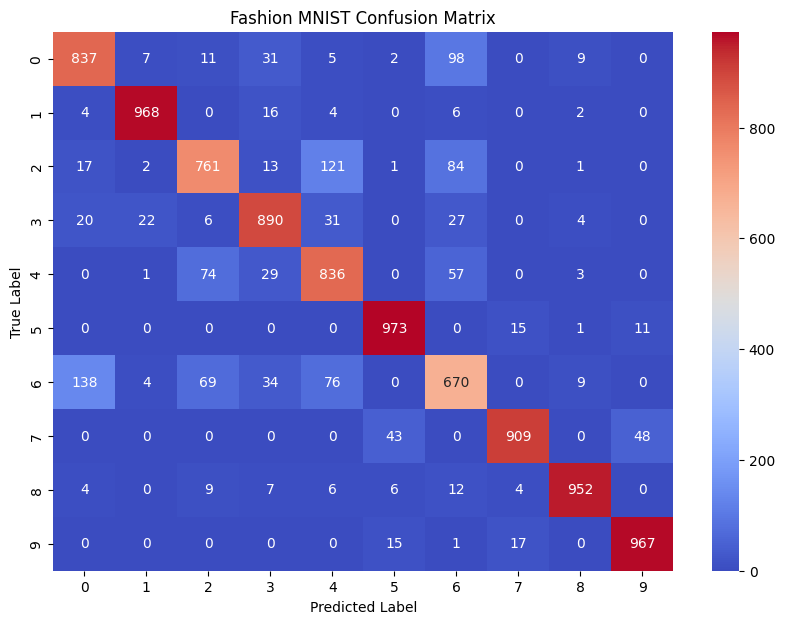

In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
y_pred = model.forward(X_test)  # Get predictions
predicted = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
correct = np.sum(predicted == y_test_labels)
total = y_test.shape[0]

# Calculate accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

# Log to W&B
wandb.log({"Test Accuracy": test_accuracy})

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, predicted)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fashion MNIST Confusion Matrix")
plt.show()


Test Accuracy: 0.8763


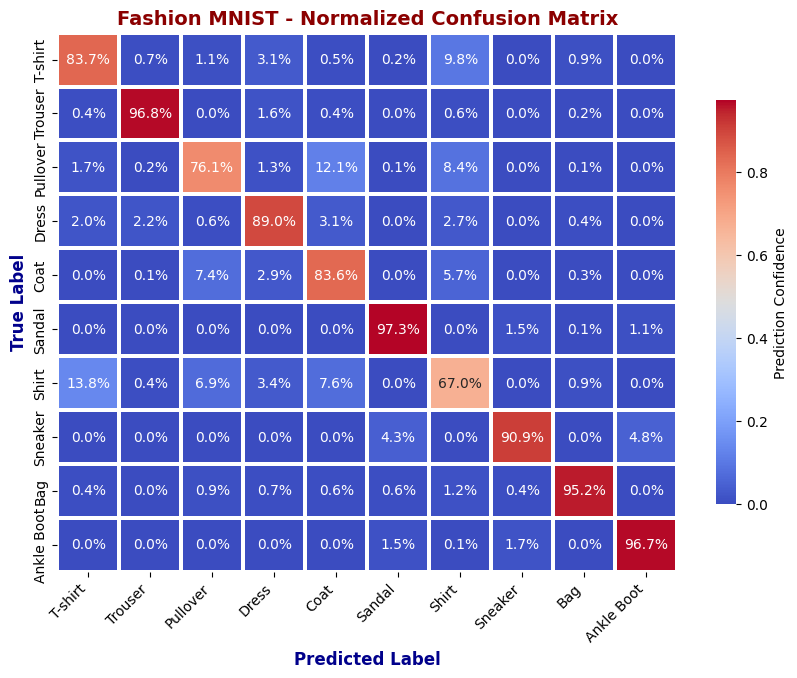

In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test set
y_pred = model.forward(X_test)  # Get predictions
predicted = np.argmax(y_pred, axis=1)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
correct = np.sum(predicted == y_test_labels)
total = y_test.shape[0]

# Calculate accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

# Log to W&B
wandb.log({"Test Accuracy": test_accuracy})

# Compute Confusion Matrix
cm = confusion_matrix(y_test_labels, predicted)

# Normalize by row (actual class occurrences)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Set custom labels (update with actual class names if applicable)
fashion_mnist_labels = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Plot using seaborn with creative enhancements
plt.figure(figsize=(10, 7))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # More visually engaging colormap
sns.heatmap(cm_percentage, annot=True, fmt=".1%", cmap=cmap, linewidths=1.5, 
            xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels, 
            cbar_kws={"shrink": 0.75, "label": "Prediction Confidence"})

# Add title and labels with enhanced styling
plt.xlabel("Predicted Label", fontsize=12, fontweight='bold', color="darkblue")
plt.ylabel("True Label", fontsize=12, fontweight='bold', color="darkblue")
plt.title("Fashion MNIST - Normalized Confusion Matrix", fontsize=14, fontweight='bold', color="darkred")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Save and log to W&B
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
wandb.log({"Confusion Matrix": wandb.Image("confusion_matrix.png")})
plt.show()


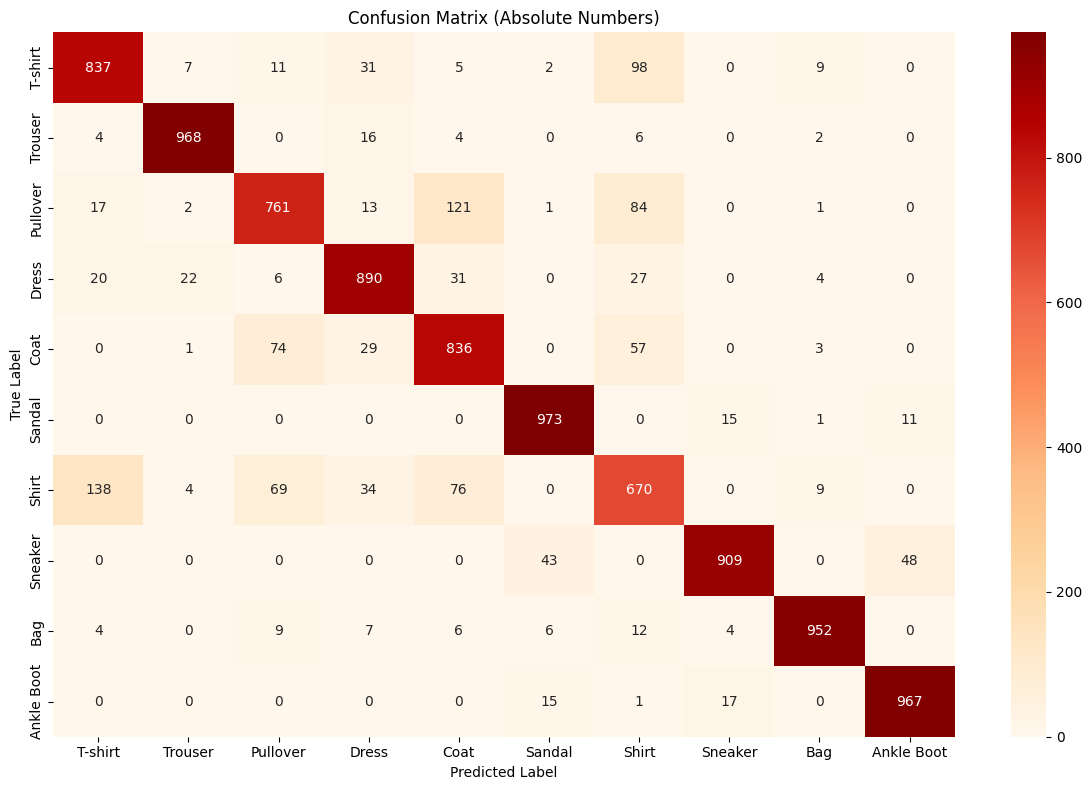

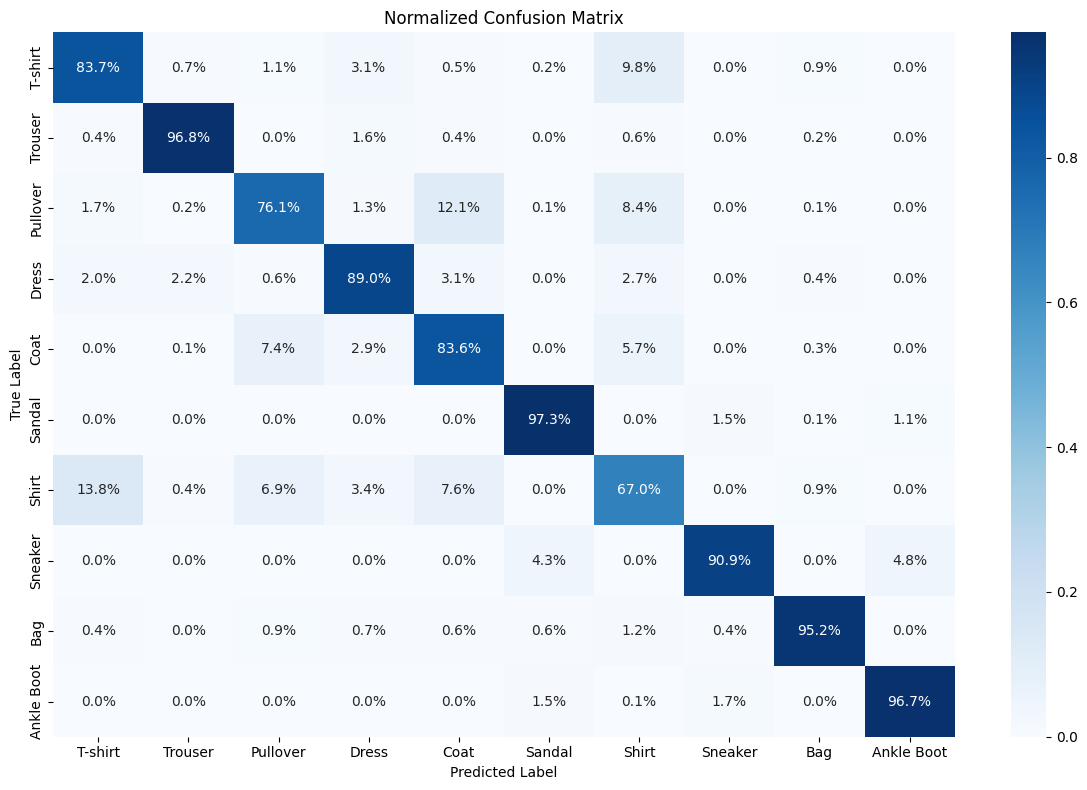

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import wandb
wandb.init(project="DL_A1_final")
wandb.run.name = f"Best model final"
wandb.run.save() 
# Compute Confusion Matrix (absolute numbers)
cm_abs = confusion_matrix(y_test_labels, predicted)

# Normalize the matrix by row (actual class occurrences)
cm_norm = cm_abs.astype('float') / cm_abs.sum(axis=1)[:, np.newaxis]

# Define class labels (modify if needed)
fashion_mnist_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", 
                         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Plot Absolute Confusion Matrix ---
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(cm_abs, annot=True, fmt="d", cmap="OrRd", xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Absolute Numbers)")
plt.tight_layout()  # Fix layout issues
plt.savefig("confusion_matrix_absolute.png", dpi=300)  # High-resolution
wandb.log({"Confusion Matrix Absolute 1": wandb.Image("confusion_matrix_absolute.png", caption="Absolute Confusion Matrix")})
plt.show()

#Plot Normalized Confusion Matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(cm_norm, annot=True, fmt=".1%", cmap="Blues", xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix_normalized.png", dpi=300)
wandb.log({"Confusion Matrix Normalized 1": wandb.Image("confusion_matrix_normalized.png", caption="Normalized Confusion Matrix")})
plt.show()

plt.show()

wandb.finish()

Question 8: Comparing MSE and CE

To compare MSE and CE I try various initializations of the same hyperparameter configuration and show that Cross entropy is much better equipped to handling classification tasks.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import wandb
from Module2_final_FeedforwardNN import FeedforwardNN  # Your FeedforwardNN class

# Initialize WandB
wandb.init(project="DL_A1_final")
wandb.run.name = f"MSE vs CE"
wandb.run.save() 

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images
X_train, X_test = X_train.reshape(-1, 784), X_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

# Hyperparameters
hyperparams = {
    "input_size": 784,
    "hidden_layers": [64] * 3,  # 3 hidden layers of 64 neurons
    "output_size": 10,
    "learning_rate": 0.001,
    "optimizer": "sgd",
    "weight_init": "Xavier",
    "batch_size": 32,
    "activation": "tanh",
}

# Train with Cross Entropy Loss
model_ce = FeedforwardNN(**hyperparams, loss="cross_entropy")
model_ce.train(X_train, y_train_one_hot, epochs=10)

# Train with Squared Error Loss
model_mse = FeedforwardNN(**hyperparams, loss="mean_squared_error")
model_mse.train(X_train, y_train_one_hot, epochs=10)

# Predict on test set
y_pred_ce = np.argmax(model_ce.forward(X_test), axis=1)
y_pred_mse = np.argmax(model_mse.forward(X_test), axis=1)

# Compute accuracy
accuracy_ce = np.mean(y_pred_ce == y_test)
accuracy_mse = np.mean(y_pred_mse == y_test)

# Log results to WandB
wandb.log({"accuracy_cross_entropy": accuracy_ce, "accuracy_mse": accuracy_mse})

# Print accuracy results
print(f"Test Accuracy (Cross Entropy Loss): {accuracy_ce:.4f}")
print(f"Test Accuracy (Mean Squared Error Loss): {accuracy_mse:.4f}")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    
    # Save plot
    plt.savefig(filename)
    plt.close()
    
    # Log to WandB
    wandb.log({title: wandb.Image(filename)})

# Plot and log confusion matrices
plot_confusion_matrix(y_test, y_pred_ce, "Confusion Matrix - Cross Entropy Loss", "confusion_ce.png")
plot_confusion_matrix(y_test, y_pred_mse, "Confusion Matrix - Mean Squared Error Loss", "confusion_mse.png")

wandb.finish()

Epoch 1, Loss: 1.0715
Epoch 2, Loss: 0.9127
Epoch 3, Loss: 0.8421
Epoch 4, Loss: 0.7948
Epoch 5, Loss: 0.7726
Epoch 6, Loss: 0.7486
Epoch 7, Loss: 0.7272
Epoch 8, Loss: 0.7184
Epoch 9, Loss: 0.7065
Epoch 10, Loss: 0.6862
Epoch 1, Loss: 0.0580
Epoch 2, Loss: 0.0511
Epoch 3, Loss: 0.0475
Epoch 4, Loss: 0.0450
Epoch 5, Loss: 0.0433
Epoch 6, Loss: 0.0418
Epoch 7, Loss: 0.0407
Epoch 8, Loss: 0.0398
Epoch 9, Loss: 0.0389
Epoch 10, Loss: 0.0382
Test Accuracy (Cross Entropy Loss): 0.7881
Test Accuracy (Mean Squared Error Loss): 0.7892


accuracy_cross_entropy,▁
accuracy_mse,▁
accuracy_cross_entropy,0.7881
accuracy_mse,0.7892


Question 10: Training MNIST on best configs based on our learnings (same hyperparams but small sized NN)

In [ ]:
import numpy as np
import wandb
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from Module2_final_FeedforwardNN import FeedforwardNN

# Initialize WandB
wandb.init(project="DL_A1_final")


# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

# Reshape inputs
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train_onehot = np.eye(10)[y_train]
y_val_onehot = np.eye(10)[y_val]
y_test_onehot = np.eye(10)[y_test]

# Define models
models = [
    {"hidden_layers": [64] * 3, "learning_rate": 1e-3, "optimizer": "adam", "batch_size": 64, "activation": "relu", "weight_decay": 0},
    {"hidden_layers": [128] * 2, "learning_rate": 1e-3, "optimizer": "rmsprop", "batch_size": 64, "activation": "tanh", "weight_decay": 0.0005},
    {"hidden_layers": [64] * 2, "learning_rate": 1e-4, "optimizer": "adam", "batch_size": 32, "activation": "tanh", "weight_decay": 0}
]

results = []

for i, config in enumerate(models):
    print(f"\nTraining Model {i+1} with {config}")
    # wandb.init(project="MNIST_Hyperparameter_Comparison")
    wandb.run.name = f"MNIST {i}"
    wandb.run.save() 

    # Initialize model
    model = FeedforwardNN(
        input_size=784,
        hidden_layers=config["hidden_layers"],
        output_size=10,
        learning_rate=config["learning_rate"],
        optimizer=config["optimizer"],
        batch_size=config["batch_size"],
        weight_decay=config["weight_decay"],
        activation=config["activation"]
    )

    # Train model
    model.train(X_train, y_train_onehot, epochs=10)

    # Evaluate on test set
    y_pred_test = np.argmax(model.forward(X_test), axis=1)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"Test Accuracy for Model {i+1}: {test_accuracy:.4f}")

    # Log to WandB
    wandb.log({"test_accuracy": test_accuracy})

    # Store results
    results.append({"Model": i+1, "Accuracy": test_accuracy})

# Print final results
print("\nFinal Results:")
for r in results:
    print(f"Model {r['Model']} - Test Accuracy: {r['Accuracy']:.4f}")

wandb.finish()



Training Model 1 with {'hidden_layers': [64, 64], 'learning_rate': 0.0001, 'optimizer': 'adam', 'batch_size': 32, 'activation': 'tanh', 'weight_decay': 0}
Epoch 1, Loss: 0.6716
Epoch 2, Loss: 0.4393
Epoch 3, Loss: 0.3450
Epoch 4, Loss: 0.2977
Epoch 5, Loss: 0.2786
Epoch 6, Loss: 0.2575
Epoch 7, Loss: 0.2518
Epoch 8, Loss: 0.2365
Epoch 9, Loss: 0.2320
Epoch 10, Loss: 0.2254
Test Accuracy for Model 1: 0.9369

Final Results:
Model 1 - Test Accuracy: 0.9369


test_accuracy,▁
test_accuracy,0.9369
